## Background and Context

Best insurance company and My Bank have set up a Bancassurance(Bancassurance is a relationship between a bank and an insurance company), now using the data of liability customers of My Bank, The Best insurance company wants to convert customers with both a life insurance policy and an account in My bank to loan customers(taking a loan against a life insurance policy)

A campaign that the company ran last year for liability customers showed a healthy conversion rate of over 12.56% success. You are provided with data of customers who have an account in My bank and life insurance policy in the Best insurance company 

You as a data scientist at the Best insurance company have to build a model to identify the positively responding customers who have a higher probability of purchasing the insurance. This will increase the success ratio and reduce the cost of the campaign.

## Objective

* To predict whether a liability customer will buy a loan or not.
* Which variables are most significant for making predictions.
* Which segment of customers should be targeted more.

## Data Dictionary
* CUST_ID: Unique Customer ID 
* Target: Field - 1: Responder, 0: Non-Responder 
* Age: Customer Age in years 
* Gender: Male / Female / Other 
* Balance: Monthly Average Balance 
* Occupation: Professional / Salaried / Self Employed / SelfEmployed Non-Professional. 
* SCR: Marketing Score 
* HOLDING_PERIOD: Duration in days to hold the money 
* ACC_TYPE: Account Type: Current Account / Saving Account 
* ACC_OP_DATE: Account Open Date 
* LEN_OF_RLTN_IN_MNTH: Length of Relationship in Months 
* NO_OF_L_CR_TXNS: Number of Credit Transactions 
* NO_OF_BR_CSH_WDL_DR_TXNS: Branch Cash Withdrawal Debit Transactions 
* NO_OF_ATM_DR_TXNS: Number of ATM Debit Transactions
* NO_OF_NET_DR_TXNS: Number of Net Banking Debit Transactions 
* NO_OF_MOB_DR_TXNS: Number of Mobile Banking Debit Transactions 
* NO_OF_CHQ_DR_TXNS: Number of Cheque Debit Transactions 
* FLG_HAS_CC: Has Credit Card - 1: Yes, 0: No 
* AMT_ATM_DR: Amount Withdrawn from ATM 
* AMT_BR_CSH_WDL_DR: Amount cash withdrawn from Branch 
* AMT_CHQ_DR: Amount debited by Cheque Transactions 
* AMT_NET_DR: Amount debited by Net Transactions 
* AMT_MOB_DR: Amount debited by Mobile Transactions 
* FLG_HAS_ANY_CHGS: Flag: Has any banking charges 
* FLG_HAS_NOMINEE: Flag: Has Nominee - 1: Yes, 0: No 
* FLG_HAS_OLD_LOAN: Flag: Has any earlier loan - 1: Yes, 0: No 

## Loading Required libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with model building
from sklearn.linear_model import LogisticRegression

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# for statistical analysis 
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve

In [2]:
insurance=pd.read_csv("Bank.csv")

In [3]:
# copying data to another variable to avoid any changes to original data
data = insurance.copy()

## Checking the given data set 

In [4]:
data.head() # to see the first 5 entries

,CUST_ID,TARGET,AGE,GENDER,BALANCE,OCCUPATION,AGE_BKT,SCR,HOLDING_PERIOD,ACC_TYPE,ACC_OP_DATE,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_MOB_DR_TXNS,NO_OF_CHQ_DR_TXNS,FLG_HAS_CC,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,AMT_L_DR,FLG_HAS_ANY_CHGS,AMT_OTH_BK_ATM_USG_CHGS,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,random
0,C7927,0,27,M,3383.75,SELF-EMP,26-30,776,30,SA,3/23/2005,146,7,3,10,0,1,2,0,0,0,13100,0,0,973557.0,0,986657.0,0,0,0,0,0,13100.0,0.0,0.0,486778.50,0.0,1,1,0.000011
1,C6877,0,47,M,287489.04,SAL,46-50,324,28,SA,10-11-08,104,8,2,10,0,1,1,0,0,0,6600,0,0,799813.0,0,806413.0,1,0,0,0,0,6600.0,0.0,0.0,799813.00,0.0,1,0,0.000111
2,C19922,0,40,M,18216.88,SELF-EMP,36-40,603,2,SA,4/26/2012,61,10,5,15,1,1,1,0,2,0,11200,561120,49320,997570.0,0,1619210.0,1,0,0,0,1,11200.0,561120.0,24660.0,997570.00,0.0,1,1,0.000120
3,C8183,0,53,M,71720.48,SAL,>50,196,13,CA,07-04-08,107,36,14,50,4,2,3,1,4,0,26100,673590,60780,741506.0,71388,1573364.0,0,0,0,0,0,13050.0,168397.5,15195.0,247168.67,71388.0,1,0,0.000137
4,C12123,0,36,M,1671622.89,PROF,36-40,167,24,SA,12/29/2001,185,20,1,21,1,0,0,0,0,0,0,808480,0,0.0,0,808480.0,0,0,0,0,0,0.0,808480.0,0.0,0.00,0.0,1,0,0.000174


In [5]:
data.tail() # to see the last 5 entries

,CUST_ID,TARGET,AGE,GENDER,BALANCE,OCCUPATION,AGE_BKT,SCR,HOLDING_PERIOD,ACC_TYPE,ACC_OP_DATE,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_MOB_DR_TXNS,NO_OF_CHQ_DR_TXNS,FLG_HAS_CC,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,AMT_L_DR,FLG_HAS_ANY_CHGS,AMT_OTH_BK_ATM_USG_CHGS,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,random
19995,C4520,0,41,F,181029.01,SENP,41-45,598,15,SA,09-04-03,165,4,3,7,1,0,0,0,2,0,0,277050,59460,0.0,0,336510.0,0,0,0,0,0,0.0,277050.0,29730.0,0.0,0.0,1,1,0.999815
19996,C10147,0,37,F,46624.98,SELF-EMP,36-40,299,11,SA,05-03-13,49,17,14,31,4,2,3,1,4,0,17200,705740,24300,902772.0,46829,1696841.0,0,0,0,0,0,8600.0,176435.0,6075.0,300924.0,46829.0,1,0,0.999869
19997,C2392,0,30,M,142433.53,PROF,26-30,722,11,SA,11-01-07,115,20,16,36,8,2,0,1,5,0,33400,83740,62210,0.0,132010,311360.0,0,0,0,0,0,16700.0,10467.5,12442.0,0.0,132010.0,1,0,0.999882
19998,C14659,0,46,M,394654.75,SAL,46-50,234,4,SA,8/22/2006,129,11,6,17,1,1,0,0,4,1,7700,195790,43550,0.0,0,247040.0,0,0,0,0,0,7700.0,195790.0,10887.5,0.0,0.0,1,0,0.999908
19999,C12911,1,41,M,7152.60,SELF-EMP,41-45,561,12,SA,6/21/2014,35,10,6,16,1,1,0,0,4,1,15100,276520,61510,0.0,0,353130.0,0,0,0,0,0,15100.0,276520.0,15377.5,0.0,0.0,1,0,0.999947


## Shape of the given data set 

The given data set has 20000 rows and 40 columns 

In [6]:
data.shape

(20000, 40)

## checking for null values and basic information about the data set 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CUST_ID                   20000 non-null  object 
 1   TARGET                    20000 non-null  int64  
 2   AGE                       20000 non-null  int64  
 3   GENDER                    20000 non-null  object 
 4   BALANCE                   20000 non-null  float64
 5   OCCUPATION                20000 non-null  object 
 6   AGE_BKT                   20000 non-null  object 
 7   SCR                       20000 non-null  int64  
 8   HOLDING_PERIOD            20000 non-null  int64  
 9   ACC_TYPE                  20000 non-null  object 
 10  ACC_OP_DATE               20000 non-null  object 
 11  LEN_OF_RLTN_IN_MNTH       20000 non-null  int64  
 12  NO_OF_L_CR_TXNS           20000 non-null  int64  
 13  NO_OF_L_DR_TXNS           20000 non-null  int64  
 14  TOT_NO

In [8]:
data.isnull().sum()


CUST_ID                     0
TARGET                      0
AGE                         0
GENDER                      0
BALANCE                     0
OCCUPATION                  0
AGE_BKT                     0
SCR                         0
HOLDING_PERIOD              0
ACC_TYPE                    0
ACC_OP_DATE                 0
LEN_OF_RLTN_IN_MNTH         0
NO_OF_L_CR_TXNS             0
NO_OF_L_DR_TXNS             0
TOT_NO_OF_L_TXNS            0
NO_OF_BR_CSH_WDL_DR_TXNS    0
NO_OF_ATM_DR_TXNS           0
NO_OF_NET_DR_TXNS           0
NO_OF_MOB_DR_TXNS           0
NO_OF_CHQ_DR_TXNS           0
FLG_HAS_CC                  0
AMT_ATM_DR                  0
AMT_BR_CSH_WDL_DR           0
AMT_CHQ_DR                  0
AMT_NET_DR                  0
AMT_MOB_DR                  0
AMT_L_DR                    0
FLG_HAS_ANY_CHGS            0
AMT_OTH_BK_ATM_USG_CHGS     0
AMT_MIN_BAL_NMC_CHGS        0
NO_OF_IW_CHQ_BNC_TXNS       0
NO_OF_OW_CHQ_BNC_TXNS       0
AVG_AMT_PER_ATM_TXN         0
AVG_AMT_PE

There are no null values 

In [9]:
data.duplicated().sum()

0

we see that there is no null values in the data set ,no duplicated values in the data set and  that the account operational date has to be changed to a unifies form and made into a date format.


In [10]:
data.drop(["CUST_ID"],axis=1,inplace=True)# dropping Customer Id as its not important in the analysis

In [11]:
data['ACC_OP_DATE']=pd.to_datetime(data['ACC_OP_DATE'])# changing account opening to date format

In [12]:
# finding the total number of Transactions
Transaction_df=data.copy()

Transaction_df['No_Transaction']= data['NO_OF_BR_CSH_WDL_DR_TXNS']+data['NO_OF_ATM_DR_TXNS']+data['NO_OF_NET_DR_TXNS']+data['NO_OF_MOB_DR_TXNS']+data['NO_OF_CHQ_DR_TXNS']

val_c = Transaction_df.No_Transaction.value_counts()
val_c

6     2883
5     2599
2     2456
4     2188
3     2018
1     1966
7     1115
14     889
0      750
15     477
8      434
16     260
21     201
18     184
9      134
19     127
10     127
17     124
22     123
20     112
27     111
26      90
25      85
23      81
13      58
24      49
29      42
31      41
28      40
30      39
32      29
11      26
65      23
62      15
61      11
69      10
60      10
63      10
73       9
67       9
12       8
74       7
66       7
72       6
68       6
64       5
70       3
71       3
Name: No_Transaction, dtype: int64

Most of the customers transact 1-7 times through various methods 

In [13]:
# finding the Total Amount Transacted
Amount_df=data.copy()
Amount_df['debited']= data['AMT_CHQ_DR']+data['AMT_NET_DR']+data['AMT_MOB_DR']

val_c = Amount_df.debited.value_counts()
val_c

0.0         4828
973557.0      13
44200.0       12
653296.0      11
24760.0       11
            ... 
152168.0       1
33500.0        1
30450.0        1
256878.0       1
671478.0       1
Name: debited, Length: 7577, dtype: int64

4828 customers have debited 0 followed by 13 customers debitting 973557.

In [14]:
#finding the total amount Withdrawn 
Amount_df['withdrawn']= data['AMT_ATM_DR']+data['AMT_BR_CSH_WDL_DR']

val_c = Amount_df.withdrawn.value_counts()
val_c

0         2156
18400       33
10500       30
2200        27
5600        26
          ... 
752900       1
216220       1
982170       1
519320       1
303100       1
Name: withdrawn, Length: 7776, dtype: int64

2156 customers have not withdrawn from the bank follwed by 33 customers who withdrew 18400.

dropping all the extra variables 

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,20000.0,0.125600,0.331406,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
AGE,20000.0,38.418150,9.577985,21.000000,30.000000,38.000000,4.600000e+01,5.500000e+01
BALANCE,20000.0,511362.192118,723592.961792,0.000000,64754.025000,231675.845000,6.538768e+05,8.360431e+06
SCR,20000.0,440.150300,249.887582,100.000000,227.000000,364.000000,6.440000e+02,9.990000e+02
HOLDING_PERIOD,20000.0,14.955650,8.642634,1.000000,7.000000,15.000000,2.200000e+01,3.100000e+01
LEN_OF_RLTN_IN_MNTH,20000.0,125.239300,54.953936,29.000000,79.000000,125.000000,1.720000e+02,2.210000e+02
NO_OF_L_CR_TXNS,20000.0,12.348050,12.151921,0.000000,6.000000,10.000000,1.400000e+01,7.500000e+01
NO_OF_L_DR_TXNS,20000.0,6.633700,7.675830,0.000000,2.000000,5.000000,7.000000e+00,7.400000e+01
TOT_NO_OF_L_TXNS,20000.0,18.975400,17.759290,0.000000,9.000000,14.000000,2.100000e+01,1.490000e+02
NO_OF_BR_CSH_WDL_DR_TXNS,20000.0,1.883000,2.263596,0.000000,1.000000,1.000000,2.000000e+00,1.500000e+01


* Age :- mean and modal age of the customers is 38
* Balance :- mean balance is 511362.192118 and modal balance is 231675.845000
* SCR :- mean SCR score is 440.150300 and modal score is 364
* Length of relationship :- most of the customers have a relationship of 125 days with the bank .
    

In [16]:
# converting the account opening date to date format 
data['ACC_OP_DATE']=data['ACC_OP_DATE'].dt.year

In [17]:
data.head()

,TARGET,AGE,GENDER,BALANCE,OCCUPATION,AGE_BKT,SCR,HOLDING_PERIOD,ACC_TYPE,ACC_OP_DATE,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_MOB_DR_TXNS,NO_OF_CHQ_DR_TXNS,FLG_HAS_CC,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,AMT_L_DR,FLG_HAS_ANY_CHGS,AMT_OTH_BK_ATM_USG_CHGS,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,random
0,0,27,M,3383.75,SELF-EMP,26-30,776,30,SA,2005,146,7,3,10,0,1,2,0,0,0,13100,0,0,973557.0,0,986657.0,0,0,0,0,0,13100.0,0.0,0.0,486778.50,0.0,1,1,0.000011
1,0,47,M,287489.04,SAL,46-50,324,28,SA,2008,104,8,2,10,0,1,1,0,0,0,6600,0,0,799813.0,0,806413.0,1,0,0,0,0,6600.0,0.0,0.0,799813.00,0.0,1,0,0.000111
2,0,40,M,18216.88,SELF-EMP,36-40,603,2,SA,2012,61,10,5,15,1,1,1,0,2,0,11200,561120,49320,997570.0,0,1619210.0,1,0,0,0,1,11200.0,561120.0,24660.0,997570.00,0.0,1,1,0.000120
3,0,53,M,71720.48,SAL,>50,196,13,CA,2008,107,36,14,50,4,2,3,1,4,0,26100,673590,60780,741506.0,71388,1573364.0,0,0,0,0,0,13050.0,168397.5,15195.0,247168.67,71388.0,1,0,0.000137
4,0,36,M,1671622.89,PROF,36-40,167,24,SA,2001,185,20,1,21,1,0,0,0,0,0,0,808480,0,0.0,0,808480.0,0,0,0,0,0,0.0,808480.0,0.0,0.00,0.0,1,0,0.000174


In [18]:
data['ACC_OP_DATE'].value_counts()

2010    1321
2007    1315
2003    1313
2004    1307
2000    1276
2013    1276
2006    1273
2009    1272
2002    1269
2005    1236
2011    1225
1999    1221
2014    1194
2008    1193
2012    1160
2001    1144
2015       5
Name: ACC_OP_DATE, dtype: int64

Most of the accounts were open 1999-2014 however 2015 had opened only 5 accounts 

In [19]:
data['ACC_TYPE'].value_counts()

SA    15759
CA     4241
Name: ACC_TYPE, dtype: int64

highest amount of accounts are saving accounts with less number of current accounts

In [20]:
data['GENDER'].value_counts()

M    14376
F     5433
O      191
Name: GENDER, dtype: int64

Most of the customers are male 

In [21]:
data['OCCUPATION'].value_counts()

SAL         5855
PROF        5417
SENP        5160
SELF-EMP    3568
Name: OCCUPATION, dtype: int64

highest number of customers are salaried customers 

In [22]:
data['TARGET'].value_counts()

0    17488
1     2512
Name: TARGET, dtype: int64

most of the customers do not respond 

In [23]:
data['FLG_HAS_CC'].value_counts()

0    13892
1     6108
Name: FLG_HAS_CC, dtype: int64

most of the customers do not have a credit card 

In [24]:
data['FLG_HAS_NOMINEE'].value_counts()

1    18023
0     1977
Name: FLG_HAS_NOMINEE, dtype: int64

most of the customers have nominee 

In [25]:
data['BALANCE'].value_counts()

0.00          76
475995.49     36
1645982.68    34
820931.13     30
518086.03     25
              ..
1172472.98     1
8878.62        1
307236.58      1
140294.05      1
300967.74      1
Name: BALANCE, Length: 9924, dtype: int64

In [26]:
Potential_df=data.copy()

Potential_df['Potential']= data['BALANCE']

val_c = Potential_df.Potential.value_counts()
val_c

0.00          76
475995.49     36
1645982.68    34
820931.13     30
518086.03     25
              ..
1172472.98     1
8878.62        1
307236.58      1
140294.05      1
300967.74      1
Name: Potential, Length: 9924, dtype: int64

In [27]:
threshold=100000
val_l=Potential_df['Potential']<=threshold
val_l.value_counts()

False    13495
True      6505
Name: Potential, dtype: int64

We see that 6505 customers have lower than 1 lakh balance and hence are more probable to take a loan 

In [28]:
data['FLG_HAS_OLD_LOAN'].value_counts()


0    10141
1     9859
Name: FLG_HAS_OLD_LOAN, dtype: int64

There is not much of a difference in customers not having old loans and having loans 

## Dropping the extra variables 

dropping all the variables thats not described in the data description 

In [29]:
data.shape # resultant shape of the data set 

(20000, 39)

## EDA 

## Univarient Analysis

In [30]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'blue') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='violet', linestyle='--') #  mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') #  median to the histogram

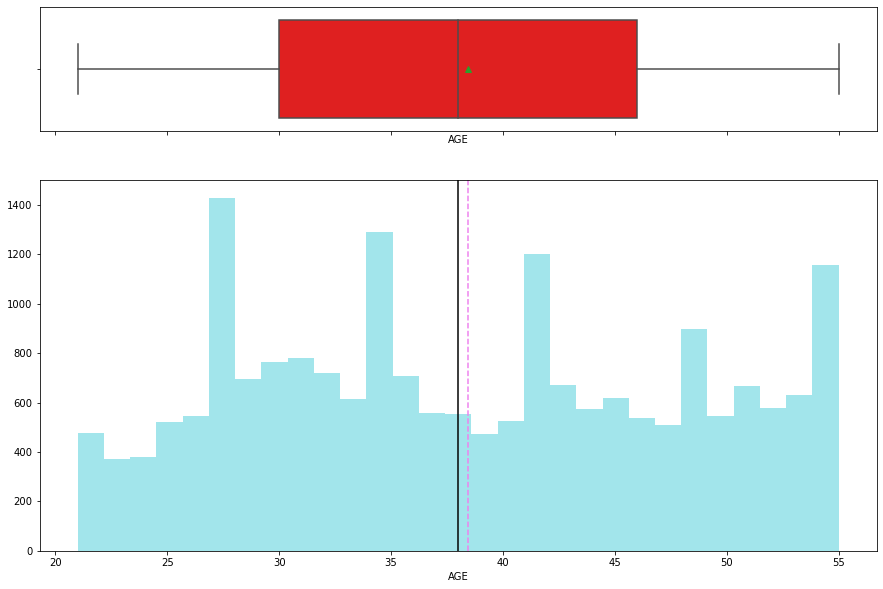

In [31]:
histogram_boxplot(data['AGE'])

* The distribution of Age is almost symmetrical about the mean and the median. 
* The mean and median age of customers is almost equal to ~(37-38) years.

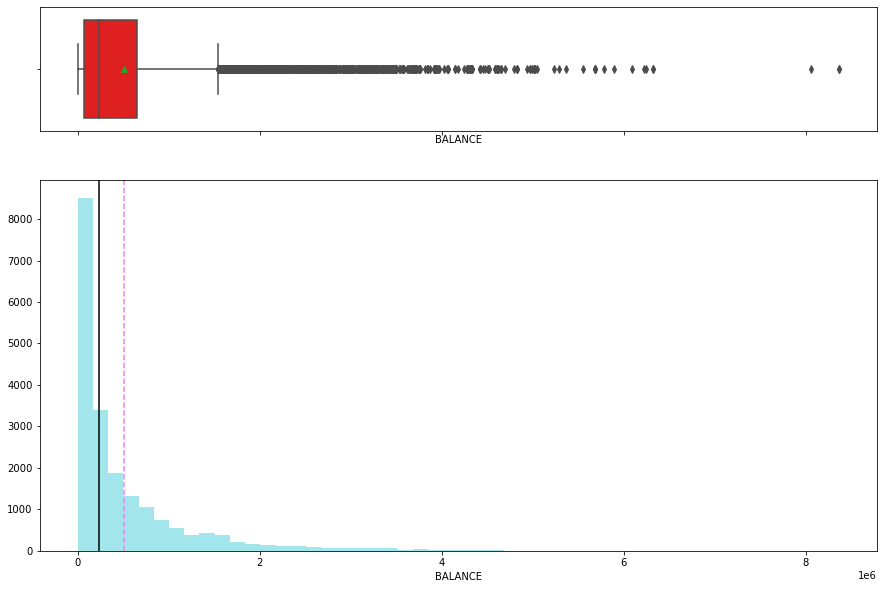

In [32]:
histogram_boxplot(data['BALANCE'])

There are a lot of outliers in balance 

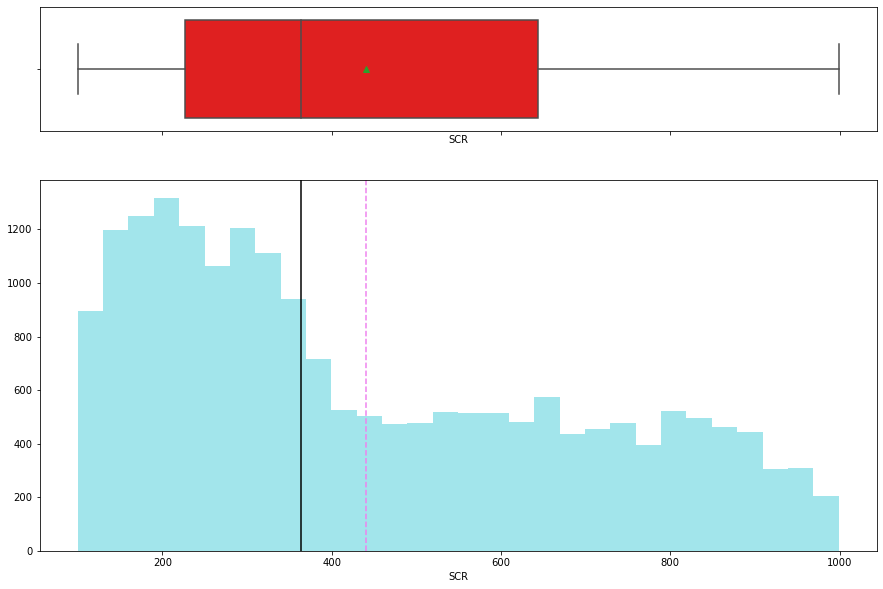

In [33]:
histogram_boxplot(data['SCR'])

* Theres a bit of unsymmetry in the distribution
* The mean is ~ 420 and the modal value is ~ 380

In [34]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

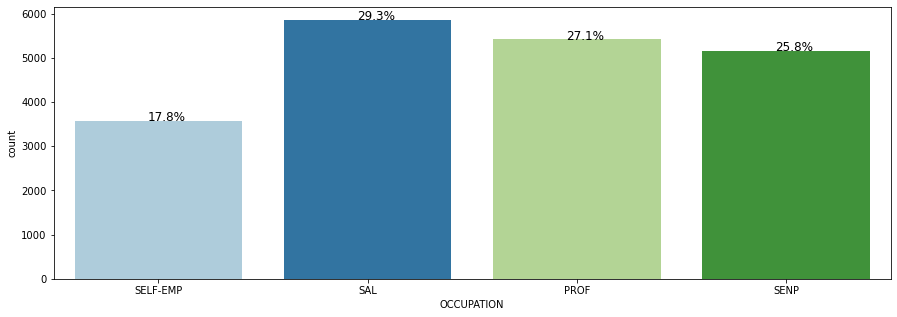

In [35]:
perc_on_bar('OCCUPATION')

Most of the customers are salaried followed by professionals and self employed non professionals.

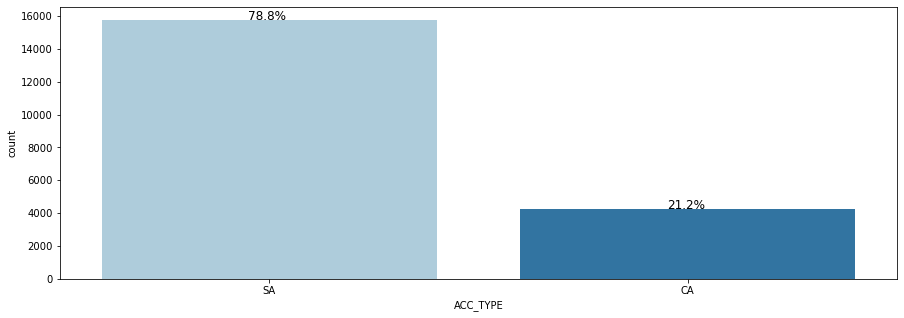

In [36]:
perc_on_bar('ACC_TYPE')

79% of the customers have a savings account.

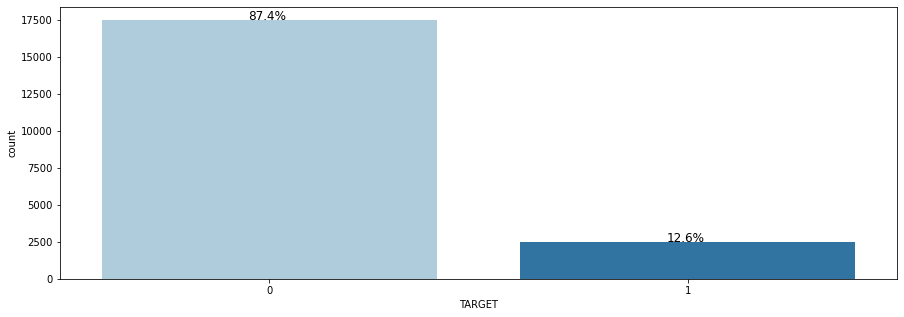

In [37]:
perc_on_bar('TARGET')

87% of the customers do not respond 

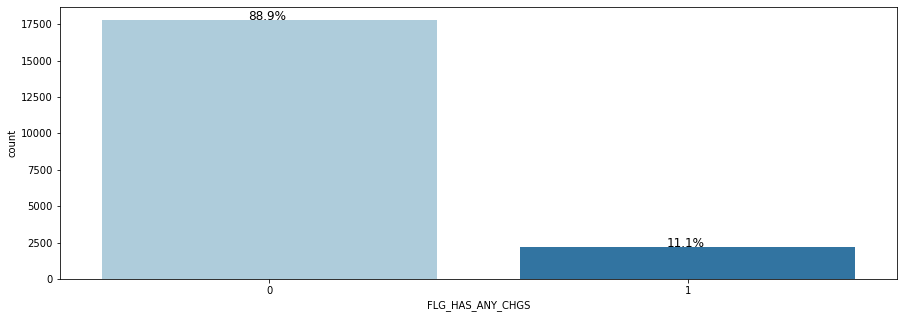

In [38]:
perc_on_bar('FLG_HAS_ANY_CHGS')

89% of the customers do not having any banking charges 

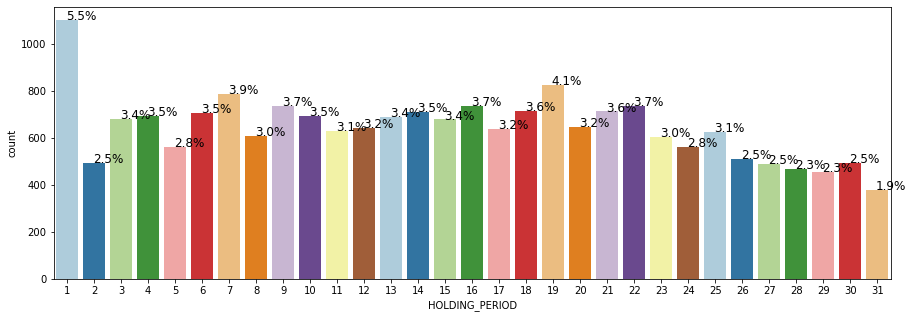

In [39]:
perc_on_bar('HOLDING_PERIOD')

The highest number of customers hold for 1 day followed by 19 days 

## Bivarient Analysis 

In [40]:
data.corr()

,TARGET,AGE,BALANCE,SCR,HOLDING_PERIOD,ACC_OP_DATE,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_MOB_DR_TXNS,NO_OF_CHQ_DR_TXNS,FLG_HAS_CC,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,AMT_L_DR,FLG_HAS_ANY_CHGS,AMT_OTH_BK_ATM_USG_CHGS,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,random
TARGET,1.000000,0.022977,-0.067062,0.078909,-0.135447,0.023967,-0.023618,0.120284,0.122954,0.134504,0.101909,0.082359,0.097071,0.054477,0.103531,0.100513,0.083251,0.048360,0.060796,0.062121,0.083215,0.095351,0.045783,0.028417,0.005053,0.011601,0.027411,0.074995,-0.002157,0.065239,0.025707,0.076258,0.011784,-0.011555,-0.001504
AGE,0.022977,1.000000,-0.122587,-0.005871,-0.012060,0.009045,-0.008279,0.030170,0.019602,0.028932,0.024266,0.006757,0.012268,0.001957,0.021800,0.014168,0.019702,0.010351,0.012189,0.004390,0.028908,0.016725,-0.008505,-0.007980,0.016437,-0.014412,-0.005830,0.018692,-0.005078,0.014456,0.000079,0.028288,0.016856,0.010269,-0.004517
BALANCE,-0.067062,-0.122587,1.000000,-0.065300,0.039241,0.001083,-0.000855,-0.047652,-0.043431,-0.051299,-0.034814,-0.030579,-0.037018,-0.021012,-0.032516,-0.019638,-0.035987,-0.020901,-0.012511,-0.029335,-0.026694,-0.033193,-0.006826,-0.010949,-0.061819,-0.009934,-0.014364,-0.035360,0.005807,-0.023732,-0.019149,-0.028727,-0.004205,-0.028707,-0.004026
SCR,0.078909,-0.005871,-0.065300,1.000000,-0.025174,-0.008288,0.009034,-0.013179,0.009389,-0.004952,0.004827,0.014910,0.006476,0.001236,0.008708,0.030116,0.009744,-0.019841,0.004519,0.023654,-0.012588,0.003485,0.014432,0.007902,0.008682,0.000864,0.006541,0.019440,-0.022531,0.008267,0.025731,-0.015246,-0.001952,0.013333,0.008131
HOLDING_PERIOD,-0.135447,-0.012060,0.039241,-0.025174,1.000000,-0.012291,0.011448,-0.008474,-0.347855,-0.156350,-0.196455,-0.181790,-0.250650,-0.109956,-0.473639,0.001694,-0.173627,-0.048038,-0.173118,-0.198319,-0.104097,-0.228821,-0.006915,-0.077078,-0.006945,-0.040950,-0.066337,-0.167648,0.053490,-0.209996,-0.107639,-0.080625,-0.005034,-0.002751,-0.002089
ACC_OP_DATE,0.023967,0.009045,0.001083,-0.008288,-0.012291,1.000000,-0.998004,-0.022506,-0.001322,-0.016075,0.003222,0.000017,-0.005128,0.003883,-0.005426,0.015040,0.009418,0.000667,-0.014292,-0.001788,-0.004474,-0.009411,-0.020722,0.006729,0.007151,-0.002129,-0.001666,0.017472,-0.009163,-0.013347,0.002018,-0.000657,-0.010229,0.001822,-0.003973
LEN_OF_RLTN_IN_MNTH,-0.023618,-0.008279,-0.000855,0.009034,0.011448,-0.998004,1.000000,0.021719,0.001878,0.015777,-0.003073,-0.000047,0.005921,-0.003159,0.005685,-0.015797,-0.010014,-0.001699,0.013796,0.001536,0.004806,0.008522,0.019448,-0.006432,-0.008239,0.001705,0.001299,-0.018905,0.007646,0.012910,-0.002317,0.000768,0.010750,-0.000576,0.003609
NO_OF_L_CR_TXNS,0.120284,0.030170,-0.047652,-0.013179,-0.008474,-0.022506,0.021719,1.000000,0.582878,0.936226,0.376076,0.478081,0.543464,0.456309,0.286492,-0.016830,0.436094,0.086327,0.288798,0.146708,0.394123,0.320615,0.231216,0.320125,0.026632,0.002825,0.036372,0.196087,-0.072481,0.296119,-0.070980,0.331736,0.003048,-0.001724,-0.006647
NO_OF_L_DR_TXNS,0.122954,0.019602,-0.043431,0.009389,-0.347855,-0.001322,0.001878,0.582878,1.000000,0.831203,0.566711,0.806728,0.915082,0.763748,0.608018,0.003272,0.699707,0.115308,0.466686,0.303860,0.551018,0.530682,0.177025,0.564558,0.009877,0.059746,0.085200,0.320450,-0.138214,0.496141,-0.040287,0.409491,0.000826,-0.003605,-0.005101
TOT_NO_OF_L_TXNS,0.134504,0.028932,-0.051299,-0.004952,-0.156350,-0.016075,0.015777,0.936226,0.831203,1.000000,0.502433,0.675687,0.767502,0.642399,0.459062,-0.010323,0.601078,0.108965,0.399407,0.231835,0.507941,0.448896,0.234706,0.463086,0.022458,0.027804,0.061762,0.273038,-0.109383,0.417131,-0.065890,0.404073,0.002475,-0.002790,-0.006643


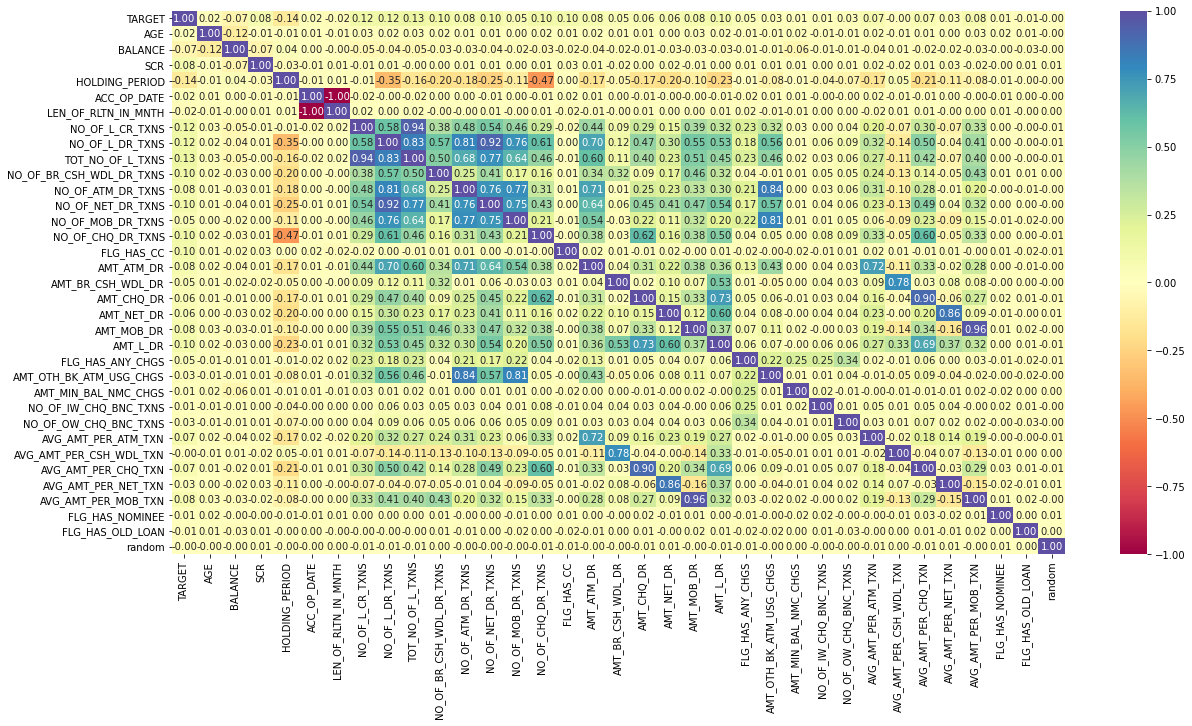

In [41]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral" )
plt.show()

* Balance And SCR have very little Correlation with the rest of the columns .
* Number of deposits/withdrawals have relations with the number of Transaction Deposit/ Withdrawal.

## Multivarient Analysis

<AxesSubplot:xlabel='OCCUPATION', ylabel='BALANCE'>

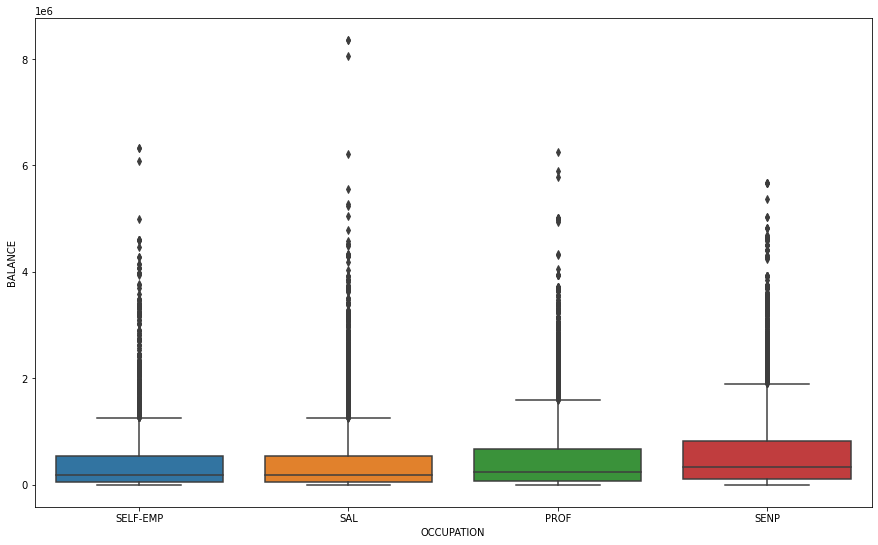

In [42]:
plt.figure(figsize=(15, 9))
sns.boxplot(x="OCCUPATION", y="BALANCE", data=data)

all the outliers are similar to each other however we see that customers having salaries have higher outliers 

<AxesSubplot:xlabel='TARGET', ylabel='BALANCE'>

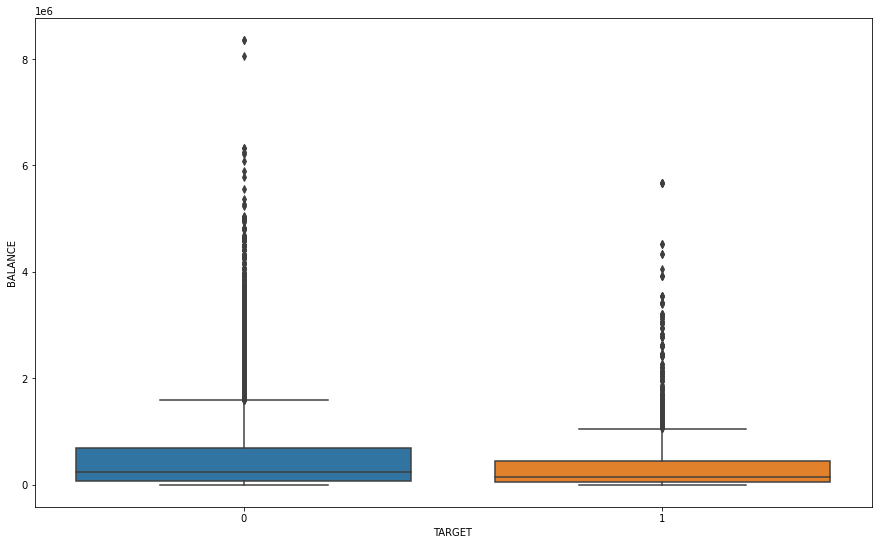

In [43]:
plt.figure(figsize=(15, 9))
sns.boxplot(x="TARGET", y="BALANCE", data=data)

Customers that do not Respond have Higher Balance than Customers that respond and we see that there are more Outliers as well .

<AxesSubplot:xlabel='OCCUPATION', ylabel='SCR'>

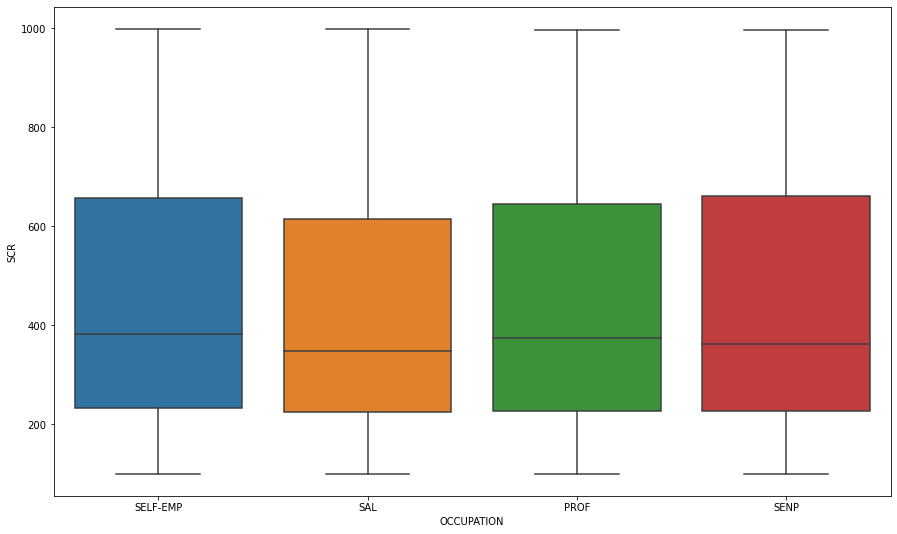

In [44]:
plt.figure(figsize=(15, 9))
sns.boxplot(x="OCCUPATION", y="SCR", data=data)

The median value of the SCR score is higher for self employed customers 

In [45]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,data['FLG_HAS_OLD_LOAN'],margins=True).sort_values(by=1,ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['FLG_HAS_OLD_LOAN'],normalize='index').sort_values(by=1,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

## Old Loan  VS Occupation

FLG_HAS_OLD_LOAN      0     1    All
OCCUPATION                          
All               10141  9859  20000
SAL                2961  2894   5855
PROF               2733  2684   5417
SENP               2642  2518   5160
SELF-EMP           1805  1763   3568
------------------------------------------------------------------------------------------------------------------------


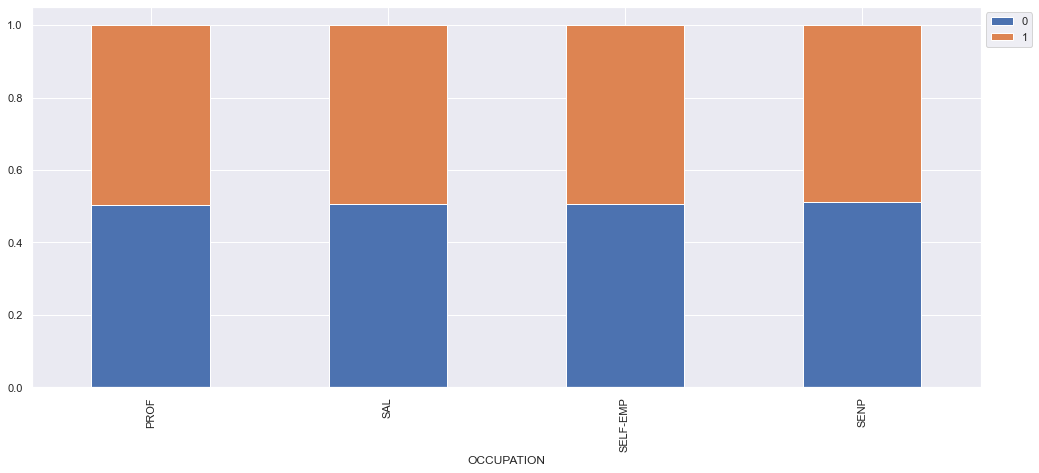

In [46]:
stacked_plot(data['OCCUPATION'])

No Significant Observations 

## Old Loan VS AGE

FLG_HAS_OLD_LOAN      0     1    All
AGE                                 
All               10141  9859  20000
31                  380   399    779
28                  444   392    836
29                  325   371    696
30                  398   366    764
51                  312   354    666
43                  319   354    673
32                  383   337    720
33                  281   335    616
41                  378   334    712
34                  289   330    619
35                  352   318    670
54                  230   317    547
27                  281   312    593
53                  323   307    630
36                  402   304    706
52                  278   302    580
37                  269   288    557
44                  287   287    574
45                  343   275    618
46                  268   271    539
26                  275   270    545
40                  256   269    525
55                  347   265    612
47                  247   264    511
3

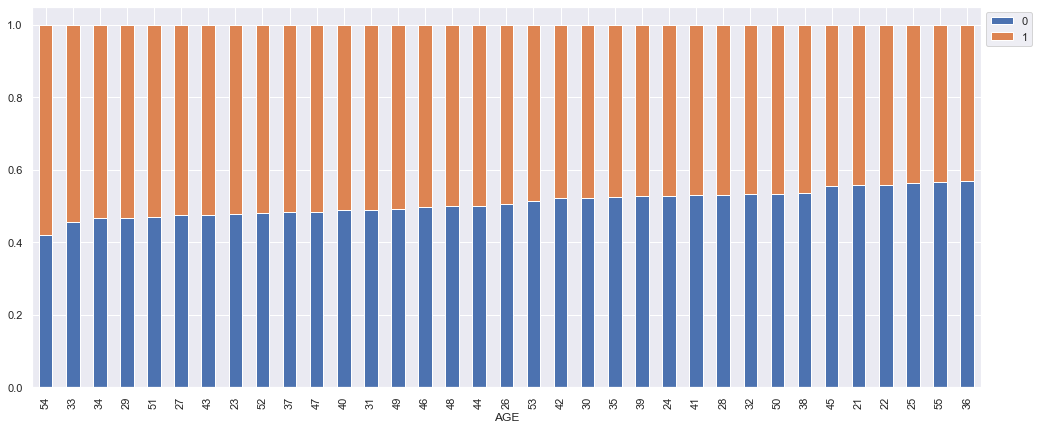

In [47]:
stacked_plot(data['AGE'])

Customers of varying Ages have had loans however customers of age 28-31 are more prone to take loans .

## Old Loan VS Target

FLG_HAS_OLD_LOAN      0     1    All
TARGET                              
All               10141  9859  20000
0                  8829  8659  17488
1                  1312  1200   2512
------------------------------------------------------------------------------------------------------------------------


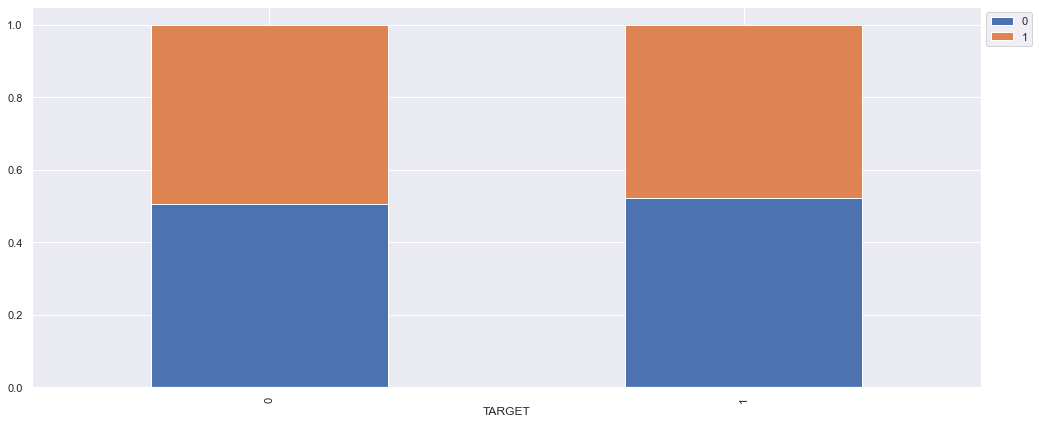

In [48]:
stacked_plot(data['TARGET'])

Non Responders are more prone to have taken loans 

## Old Loan VS Account Type

FLG_HAS_OLD_LOAN      0     1    All
ACC_TYPE                            
All               10141  9859  20000
SA                 8023  7736  15759
CA                 2118  2123   4241
------------------------------------------------------------------------------------------------------------------------


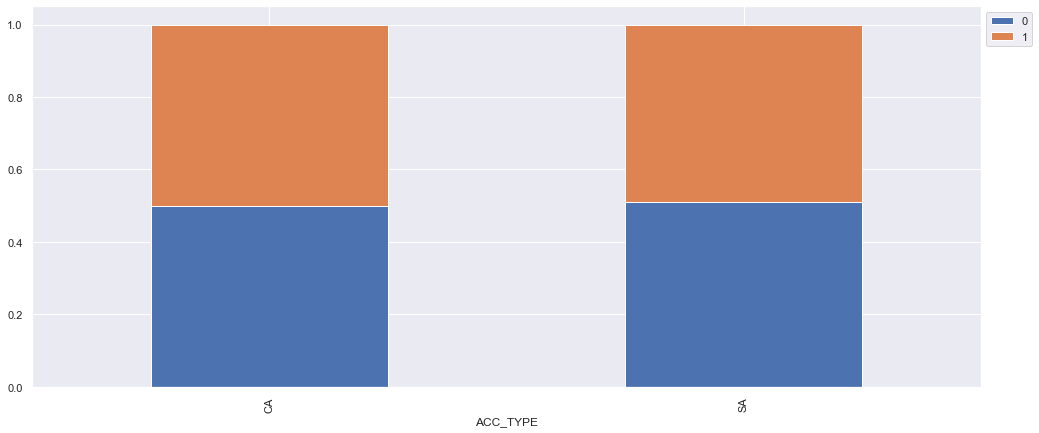

In [49]:
stacked_plot(data['ACC_TYPE'])

Customers having Savings account are more prone to take loans 

## Old Loan VS Credit Card

FLG_HAS_OLD_LOAN      0     1    All
FLG_HAS_CC                          
All               10141  9859  20000
0                  6952  6940  13892
1                  3189  2919   6108
------------------------------------------------------------------------------------------------------------------------


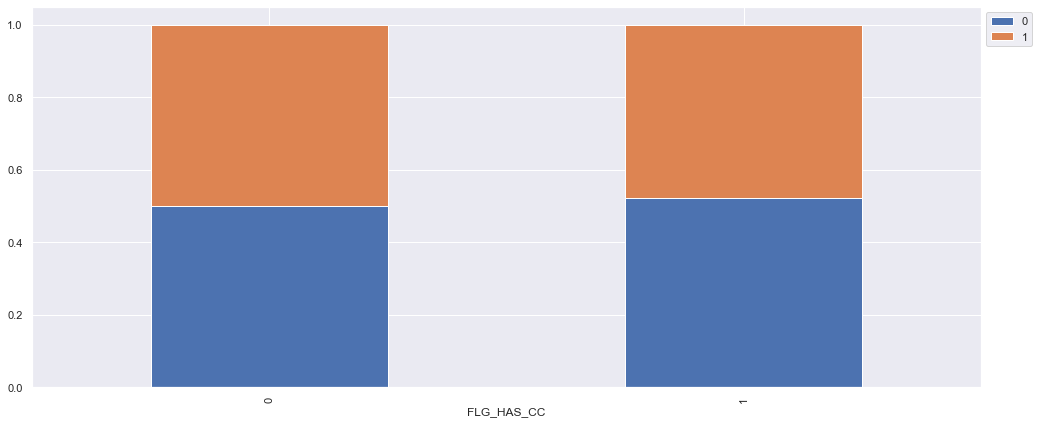

In [50]:
stacked_plot(data['FLG_HAS_CC'])

Customers that dont have Credit Cards are more prone to take loans as they have already taken loans 

In [51]:
### Function to plot distributions and Boxplots of customers

def plot(x,target='FLG_HAS_OLD_LOAN'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title(f'Distribution of {x}  of customer who requires a  Loan',fontsize=12,fontweight='bold')
    sns.distplot(data[(data[target] == 1)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title(f"Distribution of {x}  of customer who doesn't require a Loan",fontsize=12,fontweight='bold')
    sns.distplot(data[(data[target] == 0)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t Old Loan',fontsize=12,fontweight='bold')
    
    line = plt.Line2D((.1,.9),(.5,.5), color='grey', linewidth=1.5,linestyle='--')
    fig.add_artist(line)
   
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t old Loan - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow',showmeans=True) #turning off outliers from boxplot
    plt.tight_layout(pad=4)
    plt.show()

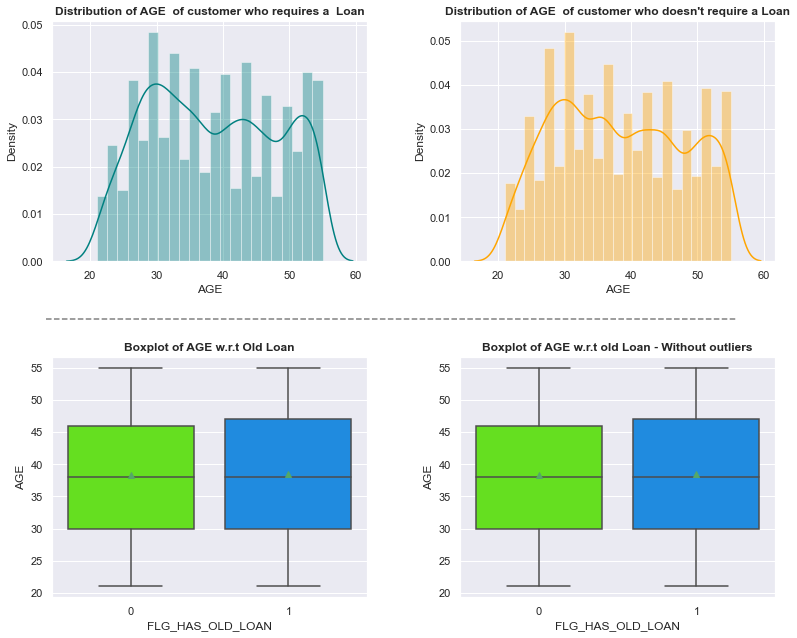

In [52]:
plot('AGE')

There is no difference in customers who took old loan and has not taken an old loan

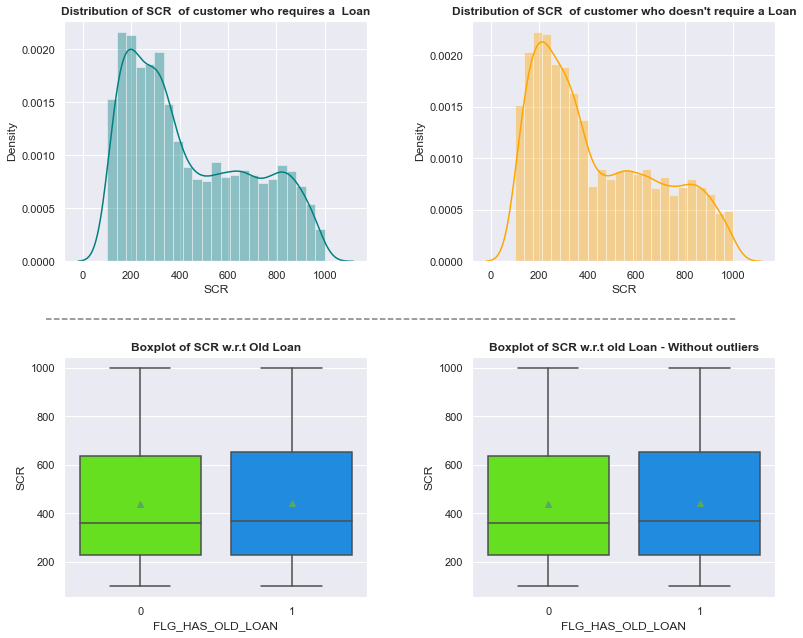

In [53]:
plot('SCR')

There is no difference in customers SCR scores

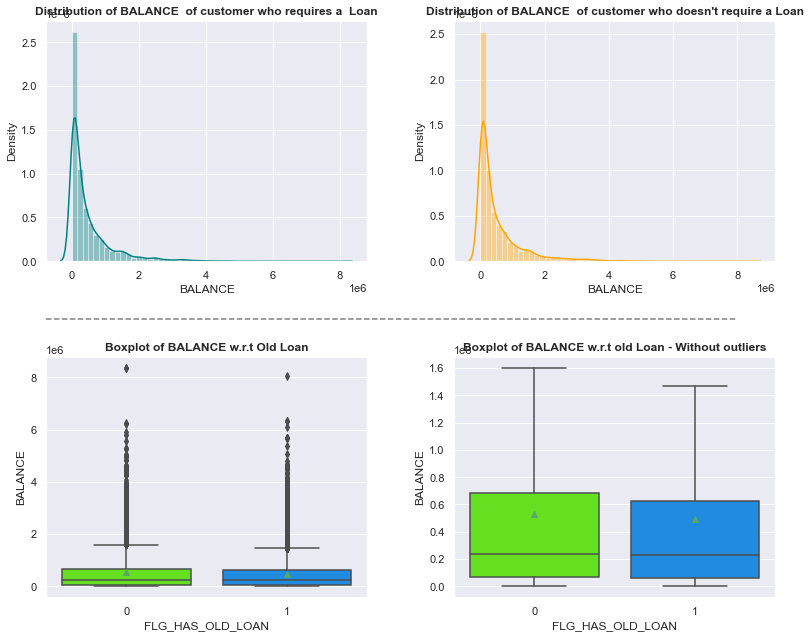

In [54]:
plot('BALANCE')

Customers that did not require a loan have higher bank Balances 

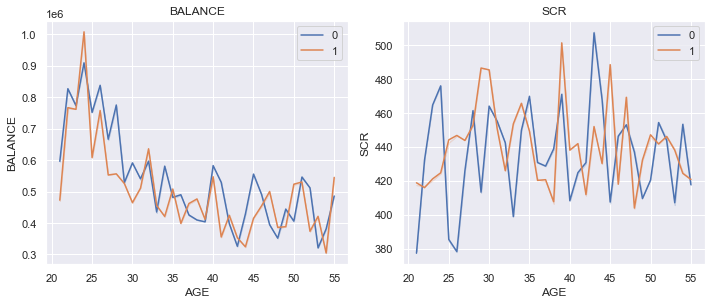

In [55]:
cols = data[['BALANCE','SCR']].columns.tolist()
plt.figure(figsize=(15,12))
for i, variable in enumerate(cols):
                     plt.subplot(3,3,i+1)
                     sns.lineplot(data['AGE'],data[variable],hue=data['FLG_HAS_OLD_LOAN'],ci=0)
                     plt.tight_layout()
                     plt.title(variable)
                     plt.legend(bbox_to_anchor=(1, 1))
plt.show()

* We see that as age increases the balance decreases and then almost remains constant from age 40-55
* There is a drastic increase and decrease in SCR score at ages 20-25 for customers who have not taken old loans and remains almost constant from 30-55 years of age 
* customers not having older loans are seen to have higher balance and SCR score overall.

## Finding Outliers 

In [56]:
Q1 = data.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [57]:
((data.select_dtypes(include=['float64','int64'])<lower) | (data.select_dtypes(include=['float64','int64'])>upper)).sum()/len(data)*100

TARGET                      12.560
AGE                          0.000
BALANCE                      8.160
SCR                          0.000
HOLDING_PERIOD               0.000
ACC_OP_DATE                  0.000
LEN_OF_RLTN_IN_MNTH          0.000
NO_OF_L_CR_TXNS              8.960
NO_OF_L_DR_TXNS             11.745
TOT_NO_OF_L_TXNS             9.560
NO_OF_BR_CSH_WDL_DR_TXNS    13.250
NO_OF_ATM_DR_TXNS            4.600
NO_OF_NET_DR_TXNS           13.765
NO_OF_MOB_DR_TXNS           22.745
NO_OF_CHQ_DR_TXNS            1.160
FLG_HAS_CC                   0.000
AMT_ATM_DR                   5.590
AMT_BR_CSH_WDL_DR            0.000
AMT_CHQ_DR                   9.790
AMT_NET_DR                   0.000
AMT_MOB_DR                  22.745
AMT_L_DR                     1.955
FLG_HAS_ANY_CHGS            11.060
AMT_OTH_BK_ATM_USG_CHGS      0.705
AMT_MIN_BAL_NMC_CHGS         0.760
NO_OF_IW_CHQ_BNC_TXNS        4.260
NO_OF_OW_CHQ_BNC_TXNS        4.435
AVG_AMT_PER_ATM_TXN          0.000
AVG_AMT_PER_CSH_WDL_

We can remove the columns having to many outliers i.e AMT_MOB_DR and NO_OF_MOB_DR_TXNS the rest of the columns can be kept .

In [58]:
data.drop(["NO_OF_MOB_DR_TXNS"],axis=1,inplace=True)
data.drop(["AMT_MOB_DR"],axis=1,inplace=True)

#data.drop(["AMT_MIN_BAL_NMC_CHGS"],axis=1,inplace=True)
#data.drop(["AMT_OTH_BK_ATM_USG_CHGS"],axis=1,inplace=True)
#data.drop(["NO_OF_L_DR_TXNS"],axis=1,inplace=True)
#data.drop(["TOT_NO_OF_L_TXNS"],axis=1,inplace=True)
#data.drop(["AMT_L_DR"],axis=1,inplace=True)
#data.drop(["NO_OF_IW_CHQ_BNC_TXNS"],axis=1,inplace=True)
#data.drop(["NO_OF_OW_CHQ_BNC_TXNS"],axis=1,inplace=True)
#data.drop(["AVG_AMT_PER_ATM_TXN"],axis=1,inplace=True)
#data.drop(["AVG_AMT_PER_CSH_WDL_TXN"],axis=1,inplace=True)
#data.drop(["AVG_AMT_PER_CHQ_TXN"],axis=1,inplace=True)
#data.drop(["AVG_AMT_PER_NET_TXN"],axis=1,inplace=True)
#data.drop(["AVG_AMT_PER_MOB_TXN"],axis=1,inplace=True)
data.drop(["AGE_BKT"],axis=1,inplace=True)




## Creating dummies 

We have 3  object type variables (Occupation,Account type and Gender) that we need to convert by using 1 hot encoding 

In [59]:
data["OCCUPATION"] = data["OCCUPATION"].astype('category')
X = data.drop(['TARGET'], axis=1)
Y = data[['TARGET']] 

X = pd.get_dummies(X, columns=['OCCUPATION','ACC_TYPE','GENDER'],drop_first=True)

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)

## Building the Model 

In [60]:
def get_metrics_score(model,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = (model.predict_proba(train)[:,1]>threshold)
    pred_test = (model.predict_proba(test)[:,1]>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True:
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [61]:
def make_confusion_matrix(model,test_X,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic Regression

Accuracy on training set :  0.5396428571428571
Accuracy on test set :  0.5423333333333333
Recall on training set :  0.6395939086294417
Recall on test set :  0.6156968876860622
Precision on training set :  0.1634005763688761
Precision on test set :  0.1559821734658896
F1 on training set :  0.2603007001032939
F1 on test set :  0.24890590809628008


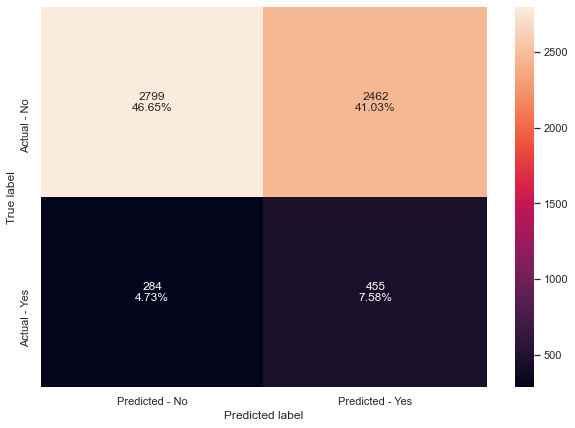

In [62]:
model = LogisticRegression(random_state=1,class_weight="balanced")
lg = model.fit(X_train,y_train)

# creating confusion matrix
make_confusion_matrix(lg,X_test,y_test)

# checking model performance
scores_LR = get_metrics_score(lg,X_train,X_test,y_train,y_test,flag=True)

The Accuracy and Precission are Low however the Recall is alright 

## ROC-AUC

### Traning set 

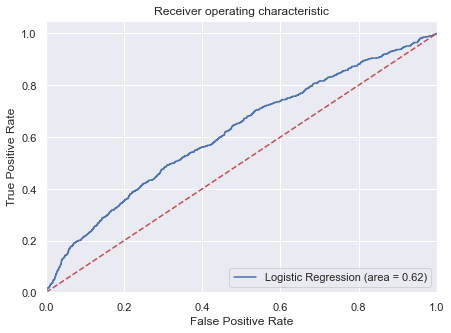

In [63]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Testing set

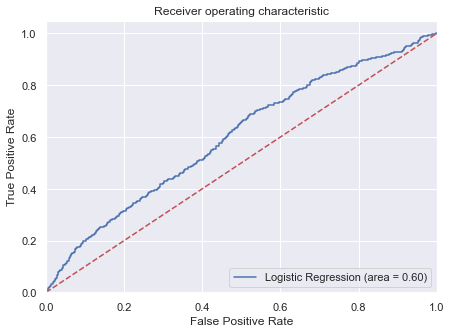

In [64]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Logistic Regression model is almost performing similarly on training and testing sets.

## Finding the coefficients 

In [65]:
log_odds = lg.coef_[0]
pd.options.display.float_format = '{:.5f}'.format
pd.DataFrame(log_odds, X_train.columns, columns=['coef']).T

,AGE,BALANCE,SCR,HOLDING_PERIOD,ACC_OP_DATE,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_CHQ_DR_TXNS,FLG_HAS_CC,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_L_DR,FLG_HAS_ANY_CHGS,AMT_OTH_BK_ATM_USG_CHGS,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,random,OCCUPATION_SAL,OCCUPATION_SELF-EMP,OCCUPATION_SENP,ACC_TYPE_SA,GENDER_M,GENDER_O
coef,-0.00000,-0.00000,0.00000,-0.00000,-0.00003,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00001,-0.00001,-0.00001,-0.00001,0.00001,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00002,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000


### odds from Coefficients

In [66]:
odds = np.exp(lg.coef_[0]) # converting coefficients to odds
pd.set_option('display.max_columns',None)  # removing limit from number of columns to display
pd.DataFrame(odds, X_train.columns, columns=['odds']).T # adding the odds to a dataframe

,AGE,BALANCE,SCR,HOLDING_PERIOD,ACC_OP_DATE,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_CHQ_DR_TXNS,FLG_HAS_CC,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_L_DR,FLG_HAS_ANY_CHGS,AMT_OTH_BK_ATM_USG_CHGS,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,random,OCCUPATION_SAL,OCCUPATION_SELF-EMP,OCCUPATION_SENP,ACC_TYPE_SA,GENDER_M,GENDER_O
odds,1.00000,1.00000,1.00000,1.00000,0.99997,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.99999,0.99999,0.99999,0.99999,1.00001,1.00000,1.00000,1.00000,1.00000,1.00000,1.00002,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


### Percentage change in odds

In [67]:
perc_change_odds = (np.exp(lg.coef_[0])-1)*100 # finding the percentage change
pd.set_option('display.max_columns',None) # removing limit from number of columns to display
pd.DataFrame(perc_change_odds, X_train.columns, columns=['change_odds%']).T # adding the change_odds% to a dataframe

,AGE,BALANCE,SCR,HOLDING_PERIOD,ACC_OP_DATE,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_CHQ_DR_TXNS,FLG_HAS_CC,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_L_DR,FLG_HAS_ANY_CHGS,AMT_OTH_BK_ATM_USG_CHGS,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,random,OCCUPATION_SAL,OCCUPATION_SELF-EMP,OCCUPATION_SENP,ACC_TYPE_SA,GENDER_M,GENDER_O
change_odds%,-0.00005,-0.00004,0.00049,-0.00009,-0.00298,-0.00029,0.00004,0.00001,0.00005,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00084,-0.00054,-0.00057,-0.00057,0.00058,0.00000,0.00001,-0.00000,-0.00000,0.00000,0.00197,-0.00006,0.00004,0.00000,-0.00040,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000


* AGE : changing the age will decrease the odds of taking a loan 
* BALANCE : changing the balance will decrease the odds of taking a loan 
* SCR : changing the SCR score will increase the odds of taking a loan
* LEN_OF_RTLN_IN_MNTH: changing the length of the relationship will decrease the odds of taking a loan.

## Improving the  Model Performance 

In [68]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.48978560235598634


In [69]:
scores_LR = get_metrics_score(lg,X_train,X_test,y_train,y_test,threshold=optimal_threshold_auc_roc,roc=True)

Accuracy on training set :  0.49607142857142855
Accuracy on test set :  0.5046666666666667
Recall on training set :  0.6993795826283136
Recall on test set :  0.6860622462787551
Precision on training set :  0.1597526410718887
Precision on test set :  0.1561441330458885
F1 on training set :  0.26009438909281596
F1 on test set :  0.25439036628198697
ROC-AUC Score on training set :  0.5829849577490959
ROC-AUC Score on test set :  0.582624356365


* Recall has increased from the Previous model 
* Precision and Accuracy has decreased from the Previous Model .
* Area under the curve is has decreased as compared to the initial model.

## Finding Thresholds 

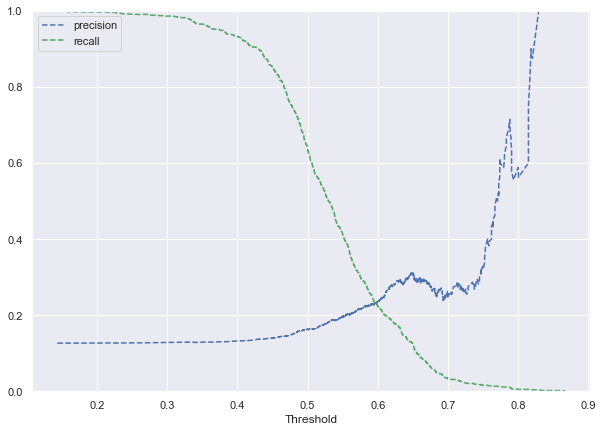

In [70]:
y_scores=lg.predict_proba(X_train)[:,1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

0.58 seeams to be a Optimum Threshold

In [71]:
optimal_threshold_curve = 0.58

scores_LR = get_metrics_score(lg,X_train,X_test,y_train,y_test,threshold=optimal_threshold_curve,roc=True)

Accuracy on training set :  0.7808571428571428
Accuracy on test set :  0.782
Recall on training set :  0.2893401015228426
Recall on test set :  0.2516914749661705
Precision on training set :  0.22102542007755277
Precision on test set :  0.19766206163655686
F1 on training set :  0.25061064973131414
F1 on test set :  0.22142857142857142
ROC-AUC Score on training set :  0.5707353161576756
ROC-AUC Score on test set :  0.5540913181711674


* We see that eve though the precission and recall lines cross close to 0.6 we see that 0.48 gives the best recall rate.
* Accuracy and Precission has increased however Recall has dropped significantly

## Sequential Selector

In [72]:
!pip install mlxtend 
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [73]:
X = data.drop(['TARGET'], axis=1)
Y = data[['TARGET']] 

X = pd.get_dummies(X, columns=['OCCUPATION','ACC_TYPE','GENDER'],drop_first=True)

#Splitting data in train and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,Y, test_size=0.30, random_state = 1)

In [74]:
# Fit the model on train
model = LogisticRegression(solver='newton-cg',n_jobs=-1,random_state=1,max_iter=100)

In [75]:
X_train2.shape

(14000, 38)

In [76]:
sfs = SFS(model, k_features=38, forward=True, floating=False, scoring='recall', verbose=2, cv=3,n_jobs=-1)

sfs = sfs.fit(X_train2, y_train2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    9.7s finished

[2021-07-07 10:29:31] Features: 1/38 -- score: 0.010716300056401578[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    9.8s finished

[2021-07-07 10:29:41] Features: 2/38 -- score: 0.012972363226170333[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   13.3s finished

[2021-07-07 10:29:55] Features: 3/38 -- score: 0.01410039481105471[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   27.3s finished

[2021-07-07 10:30:22] Features: 4/38 -- score: 0.015228426395939085[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:   25.8s fin

[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.5s finished

[2021-07-07 10:40:09] Features: 37/38 -- score: 0.0056401579244218835[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.8s finished

[2021-07-07 10:40:11] Features: 38/38 -- score: 0.0056401579244218835

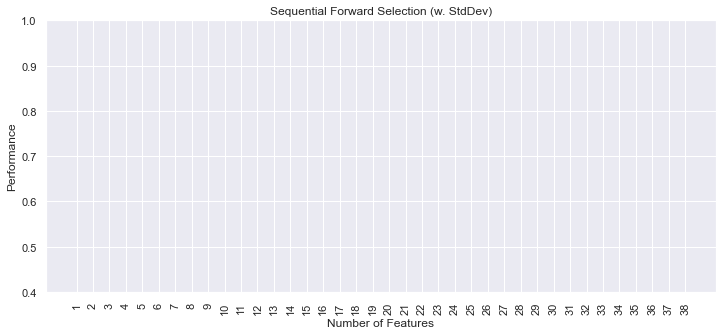

In [77]:
fig1 = plot_sfs(sfs.get_metric_dict(),kind='std_dev',figsize=(12,5))
plt.ylim([0.4, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.xticks(rotation=90)
plt.show()

From the values in the sfs model we see that at 14 features they start stabilising 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    8.9s finished

[2021-07-07 10:40:21] Features: 1/14 -- score: 0.010716300056401578[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:   10.7s finished

[2021-07-07 10:40:31] Features: 2/14 -- score: 0.012972363226170333[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   13.7s finished

[2021-07-07 10:40:45] Features: 3/14 -- score: 0.01410039481105471[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   25.7s finished

[2021-07-07 10:41:11] Features: 4/14 -- score: 0.015228426395939085[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:   26.0s fin

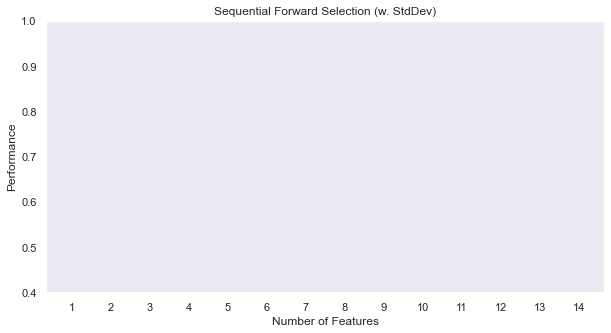

In [78]:
sfs1 = SFS(model, k_features=14, forward=True, floating=False, scoring='recall', verbose=2, cv=3,n_jobs=-1)

sfs1 = sfs1.fit(X_train, y_train)

fig1 = plot_sfs(sfs1.get_metric_dict(),kind='std_dev',figsize=(10,5))

plt.ylim([0.4, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [79]:
feat_cols = list(sfs1.k_feature_idx_)# finding the important columns 
print(feat_cols)

[1, 2, 3, 4, 6, 7, 8, 10, 12, 13, 22, 29, 32, 33]


In [80]:
X_train2.columns[feat_cols] # names of important columns 

Index(['BALANCE', 'SCR', 'HOLDING_PERIOD', 'ACC_OP_DATE', 'NO_OF_L_CR_TXNS',
       'NO_OF_L_DR_TXNS', 'TOT_NO_OF_L_TXNS', 'NO_OF_ATM_DR_TXNS',
       'NO_OF_CHQ_DR_TXNS', 'FLG_HAS_CC', 'NO_OF_IW_CHQ_BNC_TXNS',
       'FLG_HAS_NOMINEE', 'OCCUPATION_SAL', 'OCCUPATION_SELF-EMP'],
      dtype='object')

In [81]:
X_train_final = X_train2[X_train2.columns[feat_cols]]

#Creating new x_test with the same variables that we selected for x_train
X_test_final = X_test2[X_train_final.columns]

In [82]:
#Fitting logistic regession model

logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000 
# max_iter indicates number of iteration needed to converge

logreg.fit(X_train_final, y_train2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.7s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

Accuracy on training set :  0.879
Accuracy on test set :  0.8806666666666667
Recall on training set :  0.06711787930062042
Recall on test set :  0.056833558863328824
Precision on training set :  0.7484276729559748
Precision on test set :  0.6885245901639344
F1 on training set :  0.12318840579710147
F1 on test set :  0.105


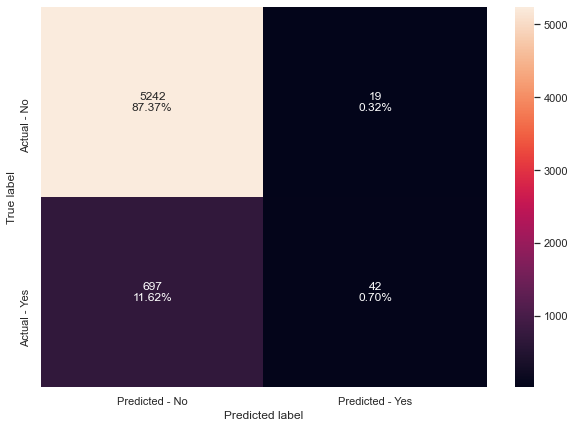

In [83]:
scores_LR = get_metrics_score(logreg,X_train_final,X_test_final,y_train2,y_test2,flag=True)

# creating confusion matrix
make_confusion_matrix(logreg,X_test_final,y_test)

The model is not performing well with fewer features 

## Decision Tree

### Split Data

In [84]:
# non-linear models aren't affected by high correlation between independent variables
X = data.drop(['TARGET'], axis=1)
Y = data[['TARGET']] 

X = pd.get_dummies(X, columns=['OCCUPATION','GENDER','ACC_TYPE'],drop_first=True)

#Splitting data in train and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,Y, test_size=0.30, random_state = 1)

## Model building 

In [85]:
from sklearn import tree
dTree =tree.DecisionTreeClassifier(criterion ='gini',random_state=1)
dTree.fit(X_train1, y_train1)

DecisionTreeClassifier(random_state=1)

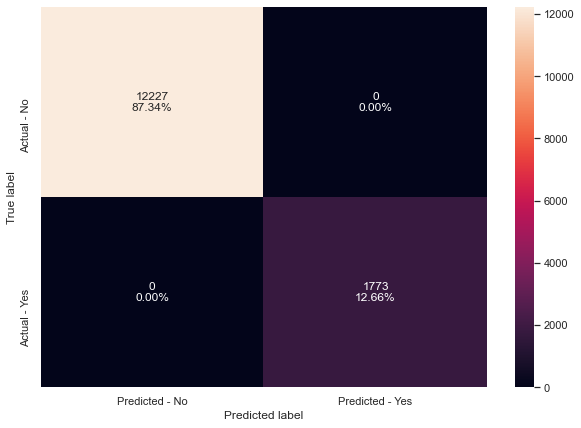

In [86]:
make_confusion_matrix(dTree,X_train1,y_train1)

0 errors each of the samples have been classified correctly 

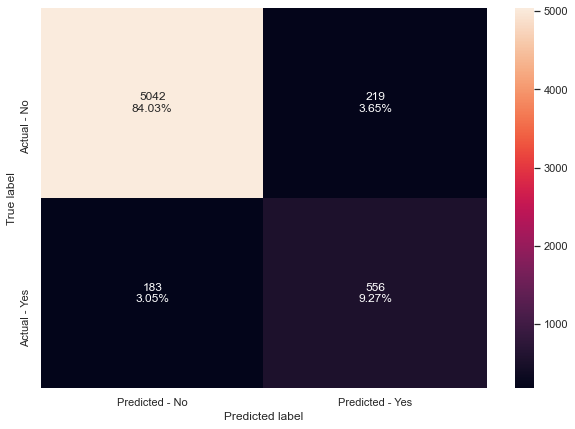

In [87]:
make_confusion_matrix(dTree,X_test1,y_test1)

In [88]:
score_DT = get_metrics_score(dTree,X_train1,X_test1,y_train,y_test,flag=True,roc=True)

Accuracy on training set :  1.0
Accuracy on test set :  0.933
Recall on training set :  1.0
Recall on test set :  0.7523680649526387
Precision on training set :  1.0
Precision on test set :  0.7174193548387097
F1 on training set :  1.0
F1 on test set :  0.7344782034346103
ROC-AUC Score on training set :  1.0
ROC-AUC Score on test set :  0.8553704989275644


In [89]:
y_pred = dTree.predict(X_test1)
recall_score(y_test1,y_pred)

0.7523680649526387

* Model has performed well on training and test set.
* Area under the curve is also 0.85 is quite good.

## Visualizing the Data Tree

In [90]:
feature_names = list(X_train1.columns) # finding the names of the features
print(feature_names)

['AGE', 'BALANCE', 'SCR', 'HOLDING_PERIOD', 'ACC_OP_DATE', 'LEN_OF_RLTN_IN_MNTH', 'NO_OF_L_CR_TXNS', 'NO_OF_L_DR_TXNS', 'TOT_NO_OF_L_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_CHQ_DR_TXNS', 'FLG_HAS_CC', 'AMT_ATM_DR', 'AMT_BR_CSH_WDL_DR', 'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_L_DR', 'FLG_HAS_ANY_CHGS', 'AMT_OTH_BK_ATM_USG_CHGS', 'AMT_MIN_BAL_NMC_CHGS', 'NO_OF_IW_CHQ_BNC_TXNS', 'NO_OF_OW_CHQ_BNC_TXNS', 'AVG_AMT_PER_ATM_TXN', 'AVG_AMT_PER_CSH_WDL_TXN', 'AVG_AMT_PER_CHQ_TXN', 'AVG_AMT_PER_NET_TXN', 'AVG_AMT_PER_MOB_TXN', 'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN', 'random', 'OCCUPATION_SAL', 'OCCUPATION_SELF-EMP', 'OCCUPATION_SENP', 'GENDER_M', 'GENDER_O', 'ACC_TYPE_SA']


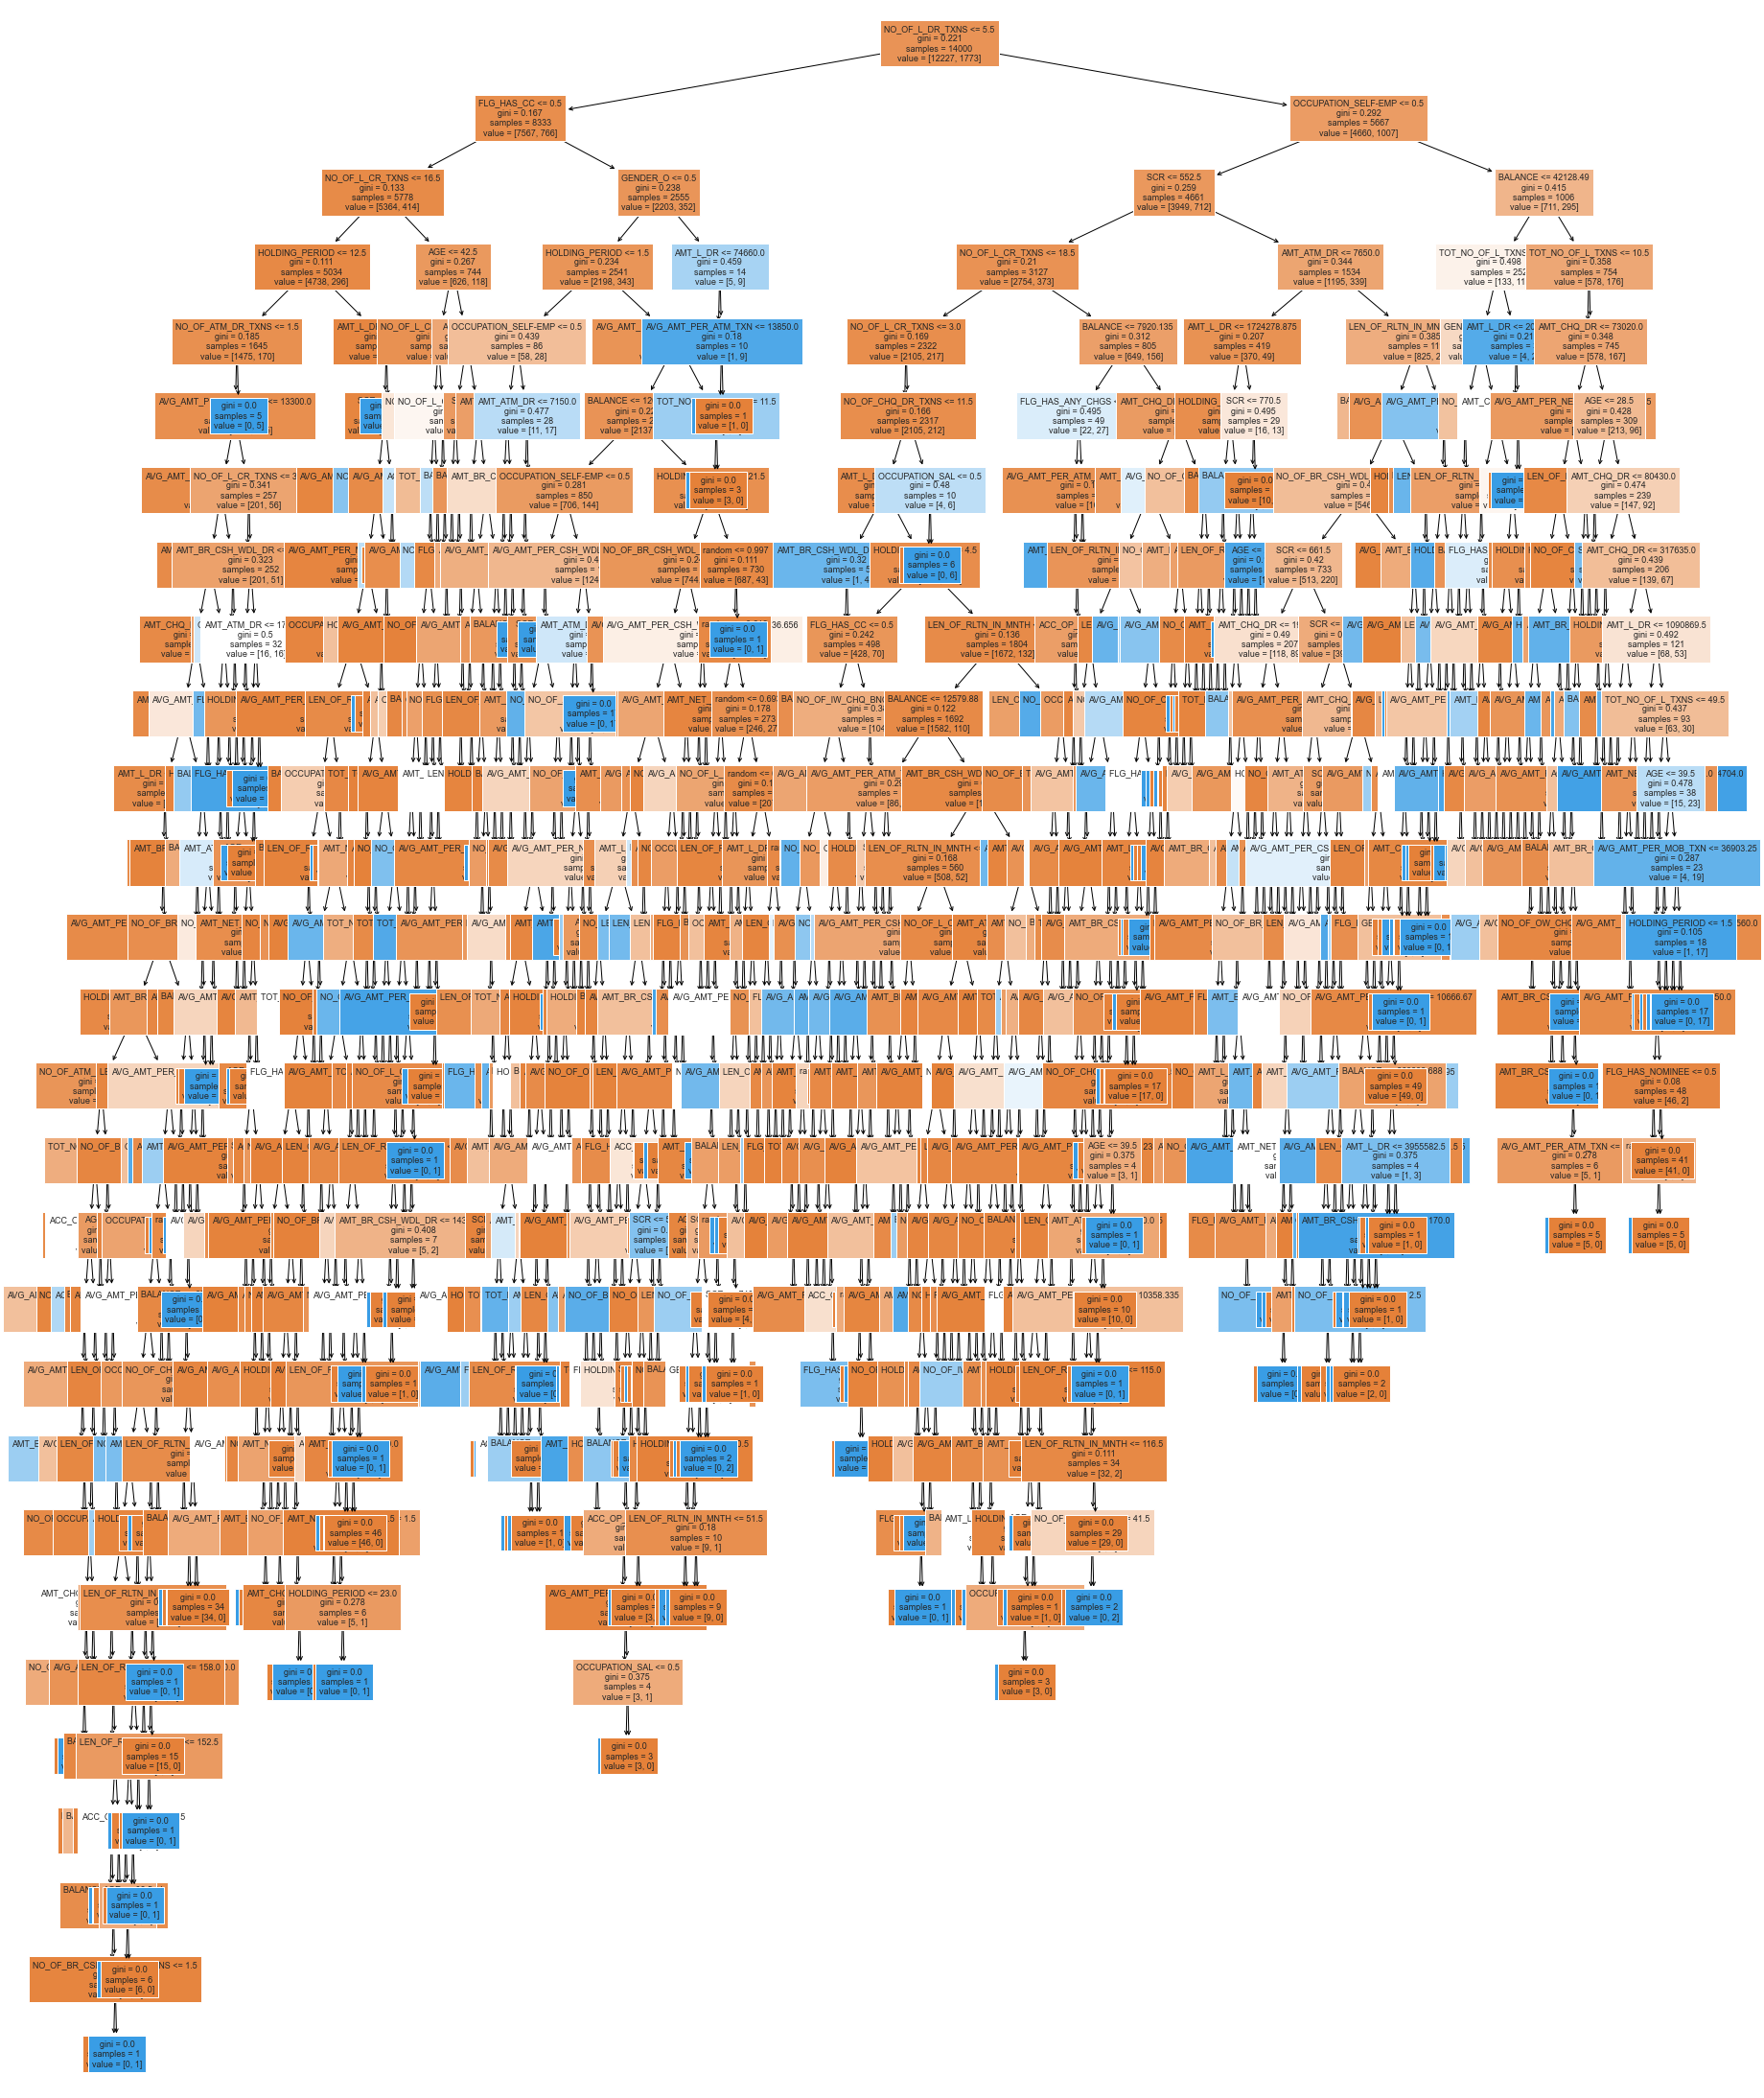

In [91]:
plt.figure(figsize=(30,40)) # drawing the plot of the tree
out = tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

### Finding the important features

In [92]:
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train1.columns).sort_values(by = 'Imp', ascending = False))

                             Imp
BALANCE                  0.09336
SCR                      0.08621
AMT_L_DR                 0.06780
AGE                      0.05715
NO_OF_L_CR_TXNS          0.05242
AMT_CHQ_DR               0.04854
LEN_OF_RLTN_IN_MNTH      0.04333
HOLDING_PERIOD           0.04219
AVG_AMT_PER_CSH_WDL_TXN  0.04217
TOT_NO_OF_L_TXNS         0.03974
AMT_BR_CSH_WDL_DR        0.03758
AVG_AMT_PER_ATM_TXN      0.03408
AMT_ATM_DR               0.03360
NO_OF_L_DR_TXNS          0.03283
AVG_AMT_PER_CHQ_TXN      0.03158
AVG_AMT_PER_NET_TXN      0.03075
AMT_NET_DR               0.02904
AVG_AMT_PER_MOB_TXN      0.02142
ACC_OP_DATE              0.02058
random                   0.02044
OCCUPATION_SELF-EMP      0.01810
NO_OF_BR_CSH_WDL_DR_TXNS 0.01459
OCCUPATION_SAL           0.01363
NO_OF_CHQ_DR_TXNS        0.01298
NO_OF_ATM_DR_TXNS        0.00920
FLG_HAS_CC               0.00890
ACC_TYPE_SA              0.00888
GENDER_M                 0.00833
FLG_HAS_ANY_CHGS         0.00618
FLG_HAS_OL

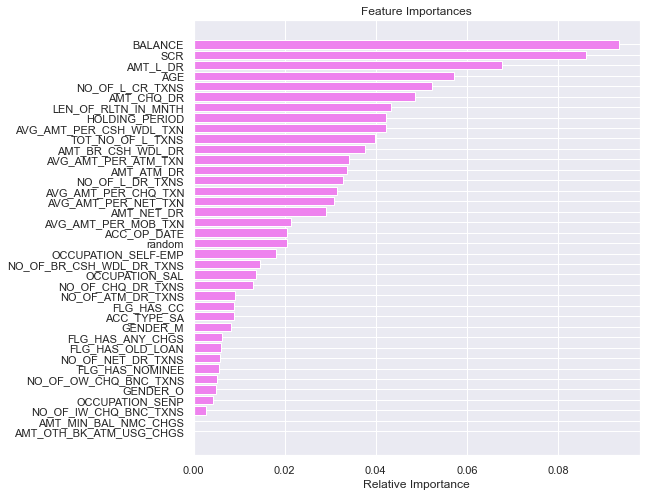

In [93]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Observations

* We see that Balance,SCR score,AMT_L_DR,Age,NO_OF_L_CR_TXNS and AMT_CHQ_DR are the top 5 important features 
* Occupation : Self employed and Salaried are two significant features 
* AMT_MIN_BAL_NMC_CHGS and AMT_OTH_BK_ATM_USG_CHGS are the least important features .

## Grid Search 

In [94]:
from sklearn.model_selection import GridSearchCV
estimator = tree.DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(10,15), 
              'min_samples_leaf': [1, 2, 3, 4, 7, 33 ],
              'max_leaf_nodes' : [2, 3, 5,9,10],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj =GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train1, y_train1)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train1, y_train1)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10, min_samples_leaf=33,
                       random_state=1)

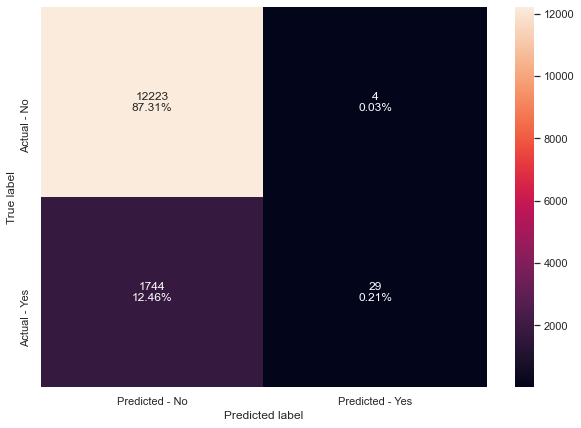

In [95]:
# let us make confusion matrix on train set
make_confusion_matrix(estimator,X_train1,y_train1)

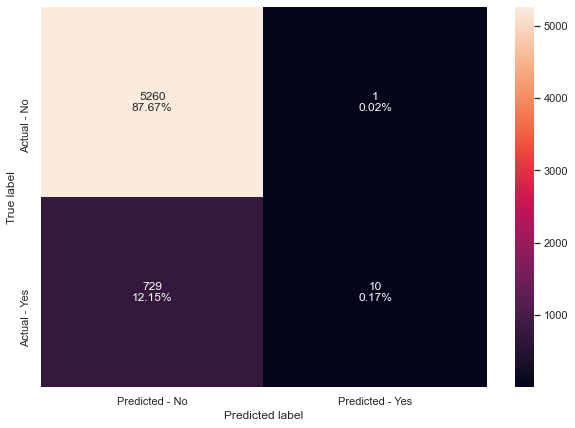

In [96]:
# let us make confusion matrix on test set
make_confusion_matrix(estimator,X_test1,y_test1)

In [97]:
# Let's check model performances for this model
scores_DT = get_metrics_score(estimator,X_train1,X_test1,y_train1,y_test1,flag=True)

Accuracy on training set :  0.8751428571428571
Accuracy on test set :  0.8783333333333333
Recall on training set :  0.016356457980823462
Recall on test set :  0.013531799729364006
Precision on training set :  0.8787878787878788
Precision on test set :  0.9090909090909091
F1 on training set :  0.03211517165005537
F1 on test set :  0.02666666666666667


 The Accuracy and Precission has increased however the Recall and F1 has decreased 

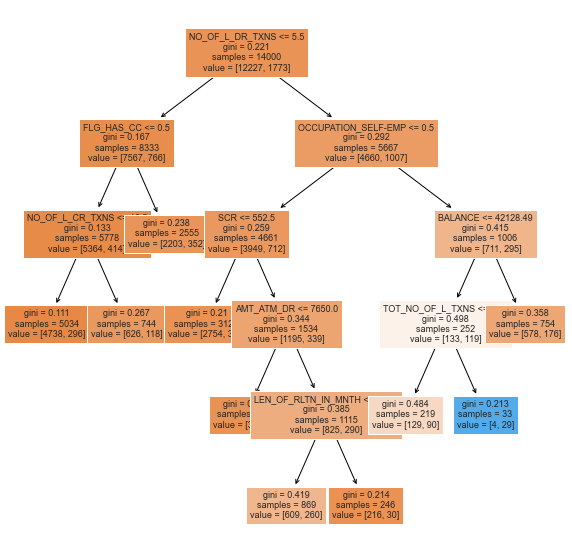

In [98]:
plt.figure(figsize=(10,10)) #plotting the Tree
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [99]:
#important features
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train1.columns).sort_values(by = 'Imp', ascending = False))

                             Imp
BALANCE                  0.09336
SCR                      0.08621
AMT_L_DR                 0.06780
AGE                      0.05715
NO_OF_L_CR_TXNS          0.05242
AMT_CHQ_DR               0.04854
LEN_OF_RLTN_IN_MNTH      0.04333
HOLDING_PERIOD           0.04219
AVG_AMT_PER_CSH_WDL_TXN  0.04217
TOT_NO_OF_L_TXNS         0.03974
AMT_BR_CSH_WDL_DR        0.03758
AVG_AMT_PER_ATM_TXN      0.03408
AMT_ATM_DR               0.03360
NO_OF_L_DR_TXNS          0.03283
AVG_AMT_PER_CHQ_TXN      0.03158
AVG_AMT_PER_NET_TXN      0.03075
AMT_NET_DR               0.02904
AVG_AMT_PER_MOB_TXN      0.02142
ACC_OP_DATE              0.02058
random                   0.02044
OCCUPATION_SELF-EMP      0.01810
NO_OF_BR_CSH_WDL_DR_TXNS 0.01459
OCCUPATION_SAL           0.01363
NO_OF_CHQ_DR_TXNS        0.01298
NO_OF_ATM_DR_TXNS        0.00920
FLG_HAS_CC               0.00890
ACC_TYPE_SA              0.00888
GENDER_M                 0.00833
FLG_HAS_ANY_CHGS         0.00618
FLG_HAS_OL

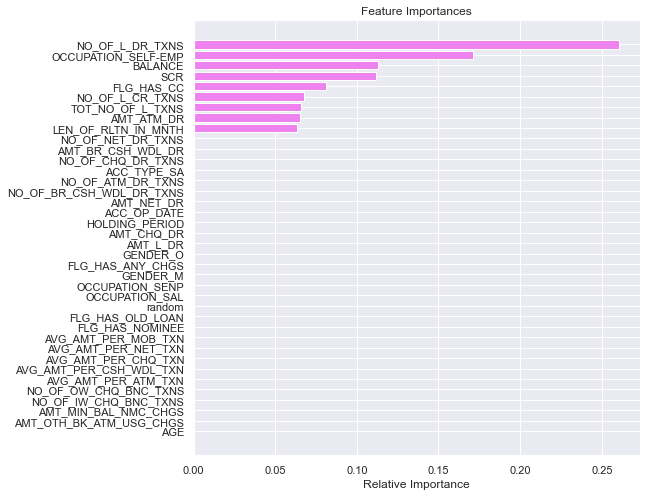

In [100]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Observations:
* We see that NO_OF_L_DR_TXNS,OCCUPATION SELF EMPLOYED,BALANCE,SCR,FLG_HAS_CC,NP_OF_L_CR_TXNS,TOT_NO_OF_L_TXNS,AMT_ATM_DR AND LEN_OF_RLTN_IN_MNTH are the only significant features 

## Cost Complexity Prunning 

In [105]:
clf = tree.DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train1, y_train1)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [106]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00000
1,0.00005,0.00014
2,0.00006,0.00026
3,0.00006,0.00069
4,0.00007,0.00082
...,...,...
454,0.00111,0.21227
455,0.00152,0.21379
456,0.00154,0.21533
457,0.00233,0.21766


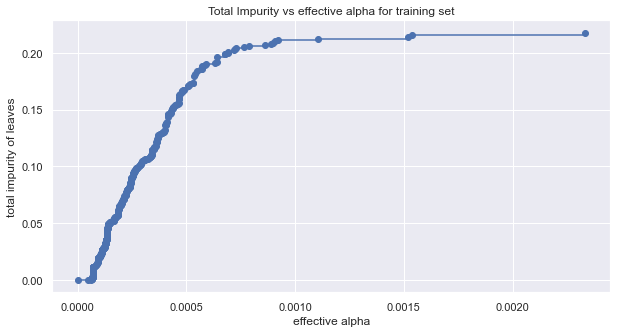

In [107]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [109]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train1, y_train1)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.003545006930792516


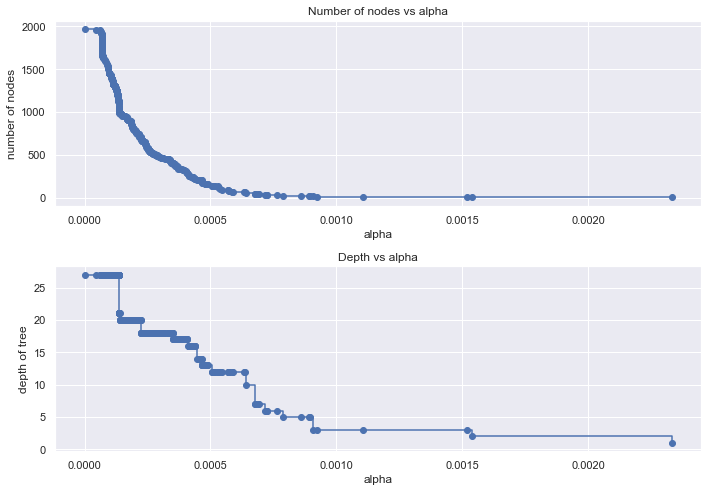

In [110]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## Recall Vs Alpha for training and test sets 

In [111]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train1)
    values_train=metrics.recall_score(y_train1,pred_train3)
    recall_train.append(values_train)
    
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test1)
    values_test=metrics.recall_score(y_test1,pred_test3)
    recall_test.append(values_test)

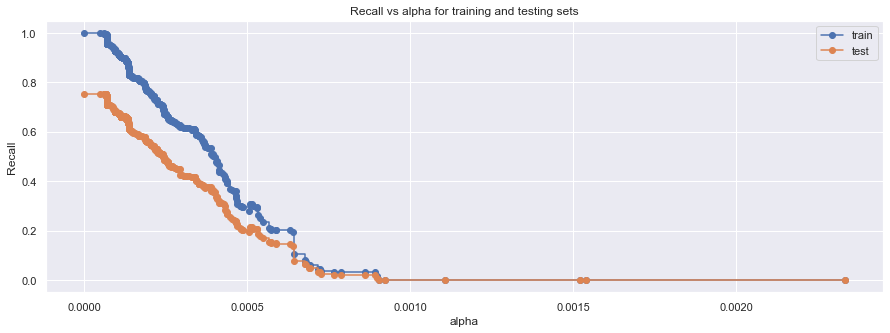

In [112]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [113]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


## Comparing Models

In [114]:
# defining list of model
models = [lg]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []
# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [115]:
# defining list of model
models = [lg]

# looping through the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,threshold=optimal_threshold_auc_roc,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [116]:
# defining list of model
models = [lg]

# looping through the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,threshold=optimal_threshold_curve,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [117]:
# defining list of model
models = [logreg]

# looping through all the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score(model,X_train_final,X_test_final,y_train,y_test,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [118]:
# defining list of model
models = [dTree,estimator,best_model]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train1,X_test1,y_train1,y_test1,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [119]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression (optimal-threshold)','Logistic Regression (Precisin-Recall curve threshold)',
                                          'Logistic Regression - SFS','Decision Tree','Decision Tree(pre-pruned)','Decision Tree(post-pruned)'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,'Train_F1_Score':f1_train,'Test_F1_Score':f1_test}) 



comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1_Score,Test_F1_Score
0,Logistic Regression,0.53964,0.54233,0.63959,0.61570,0.16340,0.15598,0.26030,0.24891
1,Logistic Regression (optimal-threshold),0.49607,0.50467,0.69938,0.68606,0.15975,0.15614,0.26009,0.25439
2,Logistic Regression (Precisin-Recall curve thr...,0.78086,0.78200,0.28934,0.25169,0.22103,0.19766,0.25061,0.22143
3,Logistic Regression - SFS,0.87900,0.88067,0.06712,0.05683,0.74843,0.68852,0.12319,0.10500
4,Decision Tree,1.00000,0.93300,1.00000,0.75237,1.00000,0.71742,1.00000,0.73448
5,Decision Tree(pre-pruned),0.87514,0.87833,0.01636,0.01353,0.87879,0.90909,0.03212,0.02667
6,Decision Tree(post-pruned),1.00000,0.93300,1.00000,0.75237,1.00000,0.71742,1.00000,0.73448


### Conclusion

* Overall we can see that Decision tree(with default parameters) performs better on given dataset.
* Looking at important variables on the basis of the feature importance in decision trees:
    *  Balance,SCR score,AMT_L_DR,Age,NO_OF_L_CR_TXNS and AMT_CHQ_DR are important attributes in predicting whether a customer will take personal loan or not.
    * From Logistic Regression model we observe that BALANCE,SCR,HOLDING_PERIOD,ACC_OP_DATE,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_CHQ_DR_TXNS,FLG_HAS_CC,NO_OF_IW_CHQ_BNC_TXNS,FLG_HAS_NOMINEE,OCCUPATION_SAL,OCCUPATION_SELF-EMP are the attributes predicting whether the customer will take the loan or not .
* most important variables according to SFS are NO_OF_L_DR_TXNS,OCCUPATION SELF EMPLOYED,BALANCE,SCR,FLG_HAS_CC,NP_OF_L_CR_TXNS,TOT_NO_OF_L_TXNS,AMT_ATM_DR AND LEN_OF_RLTN_IN_MNTH

## Recommendation:

The loan should be given to :

* Customers having Low balances(enough income to pay back the loan)
* Occupation Self employed or Salaried 
* Customers having high SCR score
* Has a credit Card 

    